# CREDIT CARD APPROVAL SYSTEM

## Life Cycle of Machine Learning Project

#### 1- Understanding Problem Statement
#### 2- Data Collection
#### 3- Data Checks to perform
#### 4- Exploratory Data Analysis
#### 5- Model Training
#### 6- Choose best model

## 1 Problem Statement 

#### This project evaluates how the customers perform based on

## 2 Data Collection


## 2.1 Import Data and required Packages


In [151]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Dataset : https://huggingface.co/datasets/Rianknow/creditscoring

In [152]:
df = pd.read_csv('data/dataset.csv')

In [153]:
df.shape

(100000, 28)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

### Checks to Perform
1. Missing values
2. Duplicates
3. data type
4. no of unique values
5. statistics of dataset
6. various categories present in different categorical columns

Dataset has missing values

# Data Cleaning

In [155]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Creating a copy of main dataframe

In [156]:
df_copy = df.copy()
df_copy.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

1. Removing spaces, _ (front and end) from string, numeric values and convert them into string/object datatype 
2. Converting dirty values to Missing 

In [157]:
for col in df_copy.columns:
    if df_copy[col].dtype == 'object':
        df_copy[col] = df_copy[col].apply(lambda x: x.strip() if isinstance(x, str) else x)
        df_copy[col] = df_copy[col].apply(lambda x: x.rstrip('_') if isinstance(x, str) else x)
        df_copy[col] = df_copy[col].apply(lambda x: x.lstrip('_') if isinstance(x, str) else x)


df_copy['Customer_ID'] = df_copy['Customer_ID'].apply(lambda x: x.lstrip('CUS_0x') if isinstance(x, str) else x)

df_copy['Payment_Behaviour'] = df_copy['Payment_Behaviour'].replace('!@9#%8', np.nan, regex=False)
df_copy['Occupation'] = df_copy['Occupation'].replace('', np.nan, regex=False)
df_copy['Credit_Mix'] = df_copy['Credit_Mix'].replace('', np.nan, regex=False)

Converting month to its numeric form

In [158]:
import calendar

month_to_num = {m: i for i,m in enumerate(calendar.month_name) if m}
df_copy["Month"] = df_copy["Month"].map(month_to_num)


In [159]:
df_copy.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Dropping irrelevant columns

In [160]:
df_copy = df_copy.drop(columns=["ID", "SSN", "Name"])

In [161]:
df_copy

Customer_ID  Month   Age Occupation Annual_Income  \
0             d40      1    23  Scientist      19114.12   
1             d40      2    23  Scientist      19114.12   
2             d40      3  -500  Scientist      19114.12   
3             d40      4    23  Scientist      19114.12   
4             d40      5    23  Scientist      19114.12   
...           ...    ...   ...        ...           ...   
99995        942c      4    25   Mechanic      39628.99   
99996        942c      5    25   Mechanic      39628.99   
99997        942c      6    25   Mechanic      39628.99   
99998        942c      7    25   Mechanic      39628.99   
99999        942c      8    25   Mechanic      39628.99   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                  3                4   
1                        NaN                  3                4   
2                        NaN                  3                4   
3                        NaN                  3                4   
4                1824.843333                  3                4   
...                      ...                ...              ...   
99995            3359.415833                  4                6   
99996            3359.415833                  4                6   
99997            3359.415833                  4                6   
99998            3359.415833                  4                6   
99999            3359.415833                  4                6   

       Interest_Rate Num_of_Loan  ... Credit_Mix  Outstanding_Debt  \
0                  3           4  ...        NaN            809.98   
1                  3           4  ...       Good            809.98   
2                  3           4  ...       Good            809.98   
3                  3           4  ...       Good            809.98   
4                  3           4  ...       Good            809.98   
...              ...         ...  ...        ...               ...   
99995              7           2  ...        NaN            502.38   
99996              7           2  ...        NaN            502.38   
99997           5729           2  ...       Good            502.38   
99998              7           2  ...       Good            502.38   
99999              7           2  ...       Good            502.38   

      Credit_Utilization_Ratio      Credit_History_Age  Payment_of_Min_Amount  \
0                    26.822620   22 Years and 1 Months                     No   
1                    31.944960                     NaN                     No   
2                    28.609352   22 Years and 3 Months                     No   
3                    31.377862   22 Years and 4 Months                     No   
4                    24.797347   22 Years and 5 Months                     No   
...                        ...                     ...                    ...   
99995                34.663572   31 Years and 6 Months                     No   
99996                40.565631   31 Years and 7 Months                     No   
99997                41.255522   31 Years and 8 Months                     No   
99998                33.638208   31 Years and 9 Months                     No   
99999                34.192463  31 Years and 10 Months                     No   

      Total_EMI_per_month Amount_invested_monthly  \
0               49.574949       80.41529543900253   
1               49.574949      118.28022162236736   
2               49.574949         81.699521264648   
3               49.574949       199.4580743910713   
4               49.574949      41.420153086217326   
...                   ...                     ...   
99995           35.104023       60.97133255718485   
99996           35.104023       54.18595028760385   
99997           35.104023       24.02847744864441   
99998           35.104023      251.67258219721603   
99999           35.104023       167.1638651610451   

                      Payment

Converting int and float types cols 

In [162]:
float_cols = ['Annual_Income','Interest_Rate', 'Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'] 

int_cols = ['Age','Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment','Num_Credit_Inquiries']

df_copy.loc[df_copy['Changed_Credit_Limit']=='','Changed_Credit_Limit'] = np.nan

cols_like_age = ['Age','Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_of_Delayed_Payment','Num_Credit_Inquiries','Interest_Rate', ]

for col in float_cols:
    # print(f'{col} started')
    df_copy[col] = df_copy[col].apply(lambda x: float(x) if not pd.isna(x) else np.nan)
    
    # print(f'{col} converted')
# print('------------------------------------------------------------------')
for col in int_cols:
    # print(f'{col} started')
    df_copy[col] = df_copy[col].apply(lambda x: int(x) if not pd.isna(x) else np.nan)

    # print(f'{col} converted')
# print('------------------------------------------------------------------')

for col in cols_like_age:
    df_copy.loc[(df_copy[col] < 0) | (df_copy[col] > 100), col] = np.nan

df_copy.loc[(df_copy['Num_Bank_Accounts'] < 0) | (df_copy['Num_Bank_Accounts'] > 60), 'Num_Bank_Accounts'] = np.nan
categorical_cols = df_copy.select_dtypes(include=['object', 'category']).columns.tolist()

# Get list of numerical columns (int, float)
numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
Numerical columns: ['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [163]:
for cols in categorical_cols:
    print(f'Value counts for column: {cols}')
    print(df_copy[cols].value_counts())
    print('--------------------------------------------------')

Value counts for column: Customer_ID
Customer_ID
d40     8
9bf4    8
5ae3    8
be9a    8
4874    8
       ..
2eb4    8
7863    8
9d89    8
c045    8
942c    8
Name: count, Length: 12500, dtype: int64
--------------------------------------------------
Value counts for column: Occupation
Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
--------------------------------------------------
Value counts for column: Type_of_Loan
Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                      

In [164]:
for col in categorical_cols:
    df_copy[col] = df_copy[col].where(df_copy[col].isna(), df_copy[col].astype("string"))

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  int64  
 2   Age                       97224 non-null   float64
 3   Occupation                92938 non-null   object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         98705 non-null   float64
 7   Num_Credit_Card           97870 non-null   float64
 8   Interest_Rate             97988 non-null   float64
 9   Num_of_Loan               95687 non-null   float64
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    91630 non-null   float64
 13  Changed_Credit_Limit      97909 non-null   fl

Imputing numerical columns by median per Customer_ID

In [165]:
features_with_na = [feat for feat in df_copy.columns if df_copy[feat].isnull().sum() > 0]
for feat in features_with_na:
    print(f'{feat}: {np.round(df_copy[feat].isnull().mean()*100,5)}% missing values')

Age: 2.776% missing values
Occupation: 7.062% missing values
Monthly_Inhand_Salary: 15.002% missing values
Num_Bank_Accounts: 1.295% missing values
Num_Credit_Card: 2.13% missing values
Interest_Rate: 2.012% missing values
Num_of_Loan: 4.313% missing values
Type_of_Loan: 11.408% missing values
Num_of_Delayed_Payment: 8.37% missing values
Changed_Credit_Limit: 2.091% missing values
Num_Credit_Inquiries: 3.567% missing values
Credit_Mix: 20.195% missing values
Credit_History_Age: 9.03% missing values
Amount_invested_monthly: 4.479% missing values
Payment_Behaviour: 7.6% missing values
Monthly_Balance: 1.2% missing values


In [166]:
df_copy[features_with_na].select_dtypes(exclude=['object']).describe()

Age  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  97224.000000           84998.000000       98705.000000   
mean      33.323274            4194.170850           5.382980   
std       10.778909            3183.686167           2.688709   
min       14.000000             303.645417           0.000000   
25%       24.000000            1625.568229           3.000000   
50%       33.000000            3093.745000           5.000000   
75%       42.000000            5957.448333           7.000000   
max      100.000000           15204.633333          60.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Num_of_Delayed_Payment  \
count     97870.000000   97988.000000  95687.000000            91630.000000   
mean          5.607980      14.546679      3.551956               13.427491   
std           2.999464       8.798523      2.668766                6.248467   
min           0.000000       1.000000      0.000000                0.000000   
25%           4.000000       7.000000      2.000000                9.000000   
50%           5.000000      13.000000      3.000000               14.000000   
75%           7.000000      20.000000      5.000000               18.000000   
max         100.000000     100.000000    100.000000               98.000000   

       Changed_Credit_Limit  Num_Credit_Inquiries  Amount_invested_monthly  \
count          97909.000000          96433.000000             95521.000000   
mean              10.389025              5.807068               637.412998   
std                6.789496              4.054166              2043.319327   
min               -6.490000              0.000000                 0.000000   
25%                5.320000              3.000000                74.534002   
50%                9.400000              5.000000               135.925682   
75%               14.870000              8.000000               265.731733   
max               36.970000             93.000000             10000.000000   

       Monthly_Balance  
count     9.880000e+04  
mean     -3.036437e+22  
std       3.181295e+24  
min      -3.333333e+26  
25%       2.700922e+02  
50%       3.367192e+02  
75%       4.702202e+02  
max       1.602041e+03

In [167]:
df_copy[features_with_na].select_dtypes(include=['object']).describe()

Occupation   Type_of_Loan Credit_Mix      Credit_History_Age  \
count       92938          88592      79805                   90970   
unique         15           6260          3                     404   
top        Lawyer  Not Specified   Standard  15 Years and 11 Months   
freq         6575           1408      36479                     446   

                     Payment_Behaviour  
count                            92400  
unique                               6  
top     Low_spent_Small_value_payments  
freq                             25513

Imputing Null Values
1. Age - Median (as mean and 50% are close)
2. Monthly_Inhand_Salary ??
3. Num_Bank_Accounts - Median 
4. Num_Credit_Card - Median
5. Interest_Rate - Median
6. Num_of_Loan - Median
7. Num_of_Delayed_Payment- Median
8. Changed_Credit_Limit - Median
9. Num_Credit_Inquiries - Median
10. Amount_invested_monthly ??
11. Monthly_Balance ??

In [168]:
def impute_int_by_customer(df, columns):
    # Compute group medians once
    group_medians = df.groupby("Customer_ID")[columns].median()

    # Map medians column-by-column
    for col in columns:
        df[col] = df[col].fillna(df["Customer_ID"].map(group_medians[col]))

    return df



In [169]:
# Impute numerical columns by median per Customer_ID
df_copy = impute_int_by_customer(df_copy, int_cols)

In [170]:
df_copy

Customer_ID  Month   Age Occupation  Annual_Income  \
0             d40      1  23.0  Scientist       19114.12   
1             d40      2  23.0  Scientist       19114.12   
2             d40      3  23.0  Scientist       19114.12   
3             d40      4  23.0  Scientist       19114.12   
4             d40      5  23.0  Scientist       19114.12   
...           ...    ...   ...        ...            ...   
99995        942c      4  25.0   Mechanic       39628.99   
99996        942c      5  25.0   Mechanic       39628.99   
99997        942c      6  25.0   Mechanic       39628.99   
99998        942c      7  25.0   Mechanic       39628.99   
99999        942c      8  25.0   Mechanic       39628.99   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                3.0              4.0   
1                        NaN                3.0              4.0   
2                        NaN                3.0              4.0   
3                        NaN                3.0              4.0   
4                1824.843333                3.0              4.0   
...                      ...                ...              ...   
99995            3359.415833                4.0              6.0   
99996            3359.415833                4.0              6.0   
99997            3359.415833                4.0              6.0   
99998            3359.415833                4.0              6.0   
99999            3359.415833                4.0              6.0   

       Interest_Rate  Num_of_Loan  ... Credit_Mix  Outstanding_Debt  \
0                3.0          4.0  ...        NaN            809.98   
1                3.0          4.0  ...       Good            809.98   
2                3.0          4.0  ...       Good            809.98   
3                3.0          4.0  ...       Good            809.98   
4                3.0          4.0  ...       Good            809.98   
...              ...          ...  ...        ...               ...   
99995            7.0          2.0  ...        NaN            502.38   
99996            7.0          2.0  ...        NaN            502.38   
99997            NaN          2.0  ...       Good            502.38   
99998            7.0          2.0  ...       Good            502.38   
99999            7.0          2.0  ...       Good            502.38   

       Credit_Utilization_Ratio      Credit_History_Age  \
0                     26.822620   22 Years and 1 Months   
1                     31.944960                     NaN   
2                     28.609352   22 Years and 3 Months   
3                     31.377862   22 Years and 4 Months   
4                     24.797347   22 Years and 5 Months   
...                         ...                     ...   
99995                 34.663572   31 Years and 6 Months   
99996                 40.565631   31 Years and 7 Months   
99997                 41.255522   31 Years and 8 Months   
99998                 33.638208   31 Years and 9 Months   
99999                 34.192463  31 Years and 10 Months   

       Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                         No           49.574949                80.415295   
1                         No           49.574949               118.280222   
2                         No           49.574949                81.699521   
3                         No           49.574949               199.458074   
4                         No           49.574949                41.420153   
...                      ...                 ...                      ...   
99995                     No           35.104023                60.971333   
99996                     No           35.104023                54.185950   
99997                     No           35.104023                24.028477   
99998                     No           35.104023               251.672582   
99999                     No           35.104023           

In [171]:
def impute_float_by_customer(df, columns):
    
    for col in columns:
        print(f"Processing: {col}")

        # Ensure column is numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Compute group median
        try:
            group_median = df.groupby("Customer_ID")[col].median()
        except Exception as e:
            print(f"Error in column {col}:", e)
            continue

        # Fill missing using map
        df[col] = df[col].fillna(df["Customer_ID"].map(group_median))

    return df


In [172]:
df_copy = impute_float_by_customer(df_copy, float_cols)

Processing: Annual_Income
Processing: Interest_Rate
Processing: Monthly_Inhand_Salary
Processing: Changed_Credit_Limit
Processing: Outstanding_Debt
Processing: Credit_Utilization_Ratio
Processing: Total_EMI_per_month
Processing: Amount_invested_monthly
Processing: Monthly_Balance


In [173]:
def impute_multiple_by_customer_mode(df, columns):
    # Compute mode for each column separately (guarantees Series output)
    for col in columns:
        print(f"Processing column: {col}")

        # Compute 1 mode per Customer_ID
        mode_series = (
            df.groupby("Customer_ID")[col]
              .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
        )

        # Fill NA values using fast vectorized map
        df[col] = df[col].fillna(df["Customer_ID"].map(mode_series))

    return df

df_copy = impute_multiple_by_customer_mode(
    df_copy,
    [col for col in categorical_cols if col != 'Credit_History_Age']
)



Processing column: Customer_ID
Processing column: Occupation
Processing column: Type_of_Loan
Processing column: Credit_Mix
Processing column: Payment_of_Min_Amount
Processing column: Payment_Behaviour
Processing column: Credit_Score


In [174]:
# Impute missing values in 'Type_of_Loan' with the mode (most frequent value) of the entire column
mode_value = df_copy['Type_of_Loan'].mode()[0]
df_copy['Type_of_Loan'] = df_copy['Type_of_Loan'].fillna(mode_value)
df_copy['Payment_of_Min_Amount'] = df_copy['Payment_of_Min_Amount'].replace('NM', 'No')


In [175]:
df_copy['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [176]:
# Function to convert "xx Years and yy Months" to total months
def convert_age_to_months(age_str):
    if pd.isna(age_str) or age_str in ['NA', '_', '']:
        return np.nan
    match = re.match(r"(\d+)\s*Years\s*and\s*(\d+)\s*Months", age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2))
        return years * 12 + months
    return np.nan

# Apply conversion
df_copy['Credit_History_Age_Months'] = df_copy['Credit_History_Age'].apply(convert_age_to_months)

# Impute missing values with median of the new numeric column
median_age = df_copy['Credit_History_Age_Months'].median()
df_copy['Credit_History_Age_Months'] = df_copy['Credit_History_Age_Months'].fillna(median_age)

# Drop the original string column if no longer needed
df_copy = df_copy.drop(columns=['Credit_History_Age'])

In [177]:
df_copy.duplicated().sum()

0

In [178]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_ID                100000 non-null  object 
 1   Month                      100000 non-null  int64  
 2   Age                        100000 non-null  float64
 3   Occupation                 100000 non-null  object 
 4   Annual_Income              100000 non-null  float64
 5   Monthly_Inhand_Salary      100000 non-null  float64
 6   Num_Bank_Accounts          100000 non-null  float64
 7   Num_Credit_Card            100000 non-null  float64
 8   Interest_Rate              100000 non-null  float64
 9   Num_of_Loan                100000 non-null  float64
 10  Type_of_Loan               100000 non-null  object 
 11  Delay_from_due_date        100000 non-null  int64  
 12  Num_of_Delayed_Payment     100000 non-null  float64
 13  Changed_Credit_Limit       100

### Missing Value Imputation is Completed and No Duplicate values found till now

In [179]:
df_copy

Customer_ID  Month   Age Occupation  Annual_Income  \
0             d40      1  23.0  Scientist       19114.12   
1             d40      2  23.0  Scientist       19114.12   
2             d40      3  23.0  Scientist       19114.12   
3             d40      4  23.0  Scientist       19114.12   
4             d40      5  23.0  Scientist       19114.12   
...           ...    ...   ...        ...            ...   
99995        942c      4  25.0   Mechanic       39628.99   
99996        942c      5  25.0   Mechanic       39628.99   
99997        942c      6  25.0   Mechanic       39628.99   
99998        942c      7  25.0   Mechanic       39628.99   
99999        942c      8  25.0   Mechanic       39628.99   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                3.0              4.0   
1                1824.843333                3.0              4.0   
2                1824.843333                3.0              4.0   
3                1824.843333                3.0              4.0   
4                1824.843333                3.0              4.0   
...                      ...                ...              ...   
99995            3359.415833                4.0              6.0   
99996            3359.415833                4.0              6.0   
99997            3359.415833                4.0              6.0   
99998            3359.415833                4.0              6.0   
99999            3359.415833                4.0              6.0   

       Interest_Rate  Num_of_Loan  ... Credit_Mix  Outstanding_Debt  \
0                3.0          4.0  ...       Good            809.98   
1                3.0          4.0  ...       Good            809.98   
2                3.0          4.0  ...       Good            809.98   
3                3.0          4.0  ...       Good            809.98   
4                3.0          4.0  ...       Good            809.98   
...              ...          ...  ...        ...               ...   
99995            7.0          2.0  ...       Good            502.38   
99996            7.0          2.0  ...       Good            502.38   
99997            7.0          2.0  ...       Good            502.38   
99998            7.0          2.0  ...       Good            502.38   
99999            7.0          2.0  ...       Good            502.38   

       Credit_Utilization_Ratio  Payment_of_Min_Amount  Total_EMI_per_month  \
0                     26.822620                     No            49.574949   
1                     31.944960                     No            49.574949   
2                     28.609352                     No            49.574949   
3                     31.377862                     No            49.574949   
4                     24.797347                     No            49.574949   
...                         ...                    ...                  ...   
99995                 34.663572                     No            35.104023   
99996                 40.565631                     No            35.104023   
99997                 41.255522                     No            35.104023   
99998                 33.638208                     No            35.104023   
99999                 34.192463                     No            35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0                   80.415295   High_spent_Small_value_payments   
1                  118.280222    Low_spent_Large_value_payments   
2                   81.699521   Low_spent_Medium_value_payments   
3                  199.458074    Low_spent_Small_value_payments   
4                   41.420153  High_spent_Medium_value_payments   
...                       ...                               ...   
99995               60.971333   High_spent_Large_value_payments   
99996               54.185950  High_spent_Medium_value_payments   
99997               24.028477   High_spent_Large_value_payments

In [180]:
neg_count = (df_copy.select_dtypes(include=[np.number]) < 0).sum()
neg_columns = neg_count[neg_count > 0]

print("Columns with negative values and their counts:")
print(neg_columns)

Columns with negative values and their counts:
Delay_from_due_date      591
Changed_Credit_Limit    1586
Monthly_Balance            9
dtype: int64


In [181]:
# Income, debt, and utilization

# Debt-to-income ratio (monthly)
df_copy["DTI"] = df_copy['Total_EMI_per_month']*100 / df_copy["Monthly_Inhand_Salary"]
# EMI burden as % of income
df_copy["EMI_to_Income"] = df_copy["Outstanding_Debt"] / df_copy["Annual_Income"]

# Investment as % of income
df_copy["Invest_to_Income"] = df_copy["Amount_invested_monthly"] / df_copy["Monthly_Inhand_Salary"]

# Balance as % of income
df_copy["Balance_to_Income"] = df_copy["Monthly_Balance"] / df_copy["Monthly_Inhand_Salary"]

# These ratios capture affordability and financial stress better than raw amounts.


In [182]:
# Credit behavior intensity

# Average delay per delayed payment
df_copy["Avg_Delay_if_Delayed"] = (
    df_copy["Delay_from_due_date"] / df_copy["Num_of_Delayed_Payment"].replace(0, 1)
)

# Any delay flag
df_copy["Has_Delays"] = (df_copy["Num_of_Delayed_Payment"] > 0).astype(int)

# High utilization flag
df_copy["High_Utilization"] = (df_copy["Credit_Utilization_Ratio"] > 0.7).astype(int)
#These features summarize repayment behavior and utilization risk.​




In [183]:
# Account and product structure

# Total cards + bank accounts
df_copy["Total_Financial_Products"] = df_copy["Num_Bank_Accounts"] + df_copy["Num_Credit_Card"] + df_copy["Num_of_Loan"]
# Inquiries per year of history
df_copy["Inquiries_per_Year"] = (
    df_copy["Num_Credit_Inquiries"] / (df_copy["Credit_History_Age_Months"] / 12).replace(0, 1)
)
#They reflect how “busy” the credit file is.​


In [184]:
# Stability / trend proxies
cols = ['Payment_of_Min_Amount', 'Credit_Score', 'Credit_Mix', 'Occupation', 'Payment_Behaviour', 'Type_of_Loan']
df_copy["Limit_Decrease_Flag"] = (df_copy["Changed_Credit_Limit"] < 0).astype(int)
df_copy["Large_Limit_Change"] = (df_copy["Changed_Credit_Limit"].abs() > 20).astype(int)
# Large or frequent limit changes can indicate risk or lender intervention.
num_features = ['Total_EMI_per_month','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance','Delay_from_due_date',
             'Num_of_Delayed_Payment','Credit_Utilization_Ratio','Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan',
             'Num_Credit_Inquiries','Credit_History_Age_Months','Changed_Credit_Limit']

In [185]:
# Handling multi-loan info

loan_cols = [c for c in df_copy.columns if c.endswith("Loan")]

1. Convert Categorical Variables to Numerical Form  - One hot encoding
2. Normalize or Scale Numerical Features - 
3. Feature Engineering: Create New/Derived Features

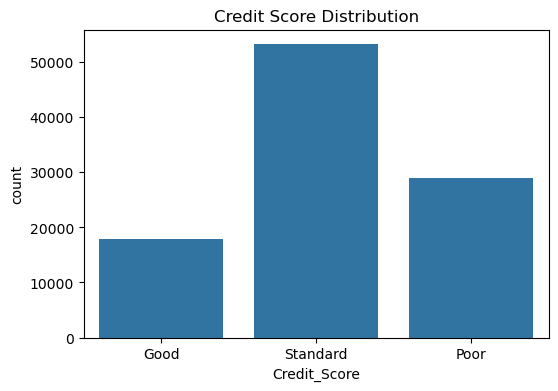

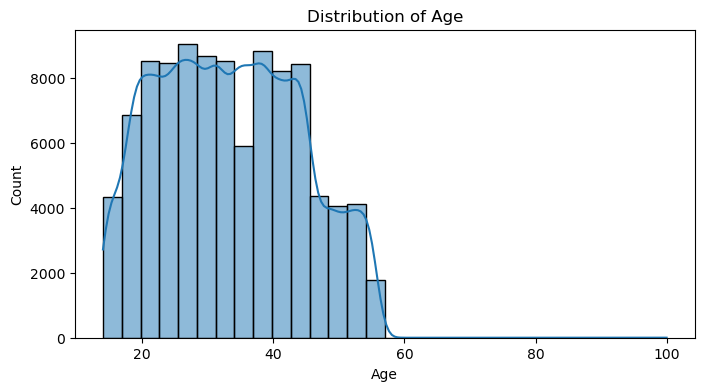

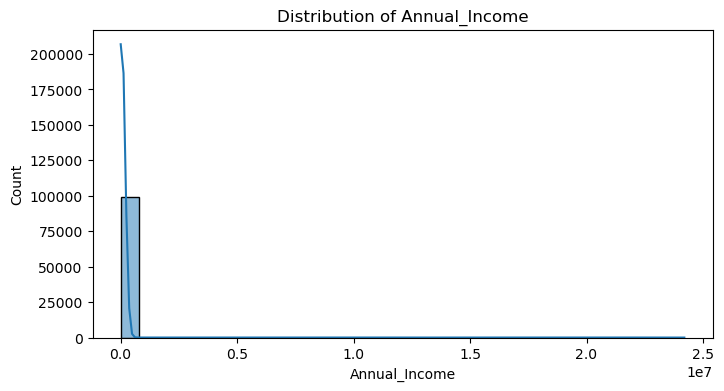

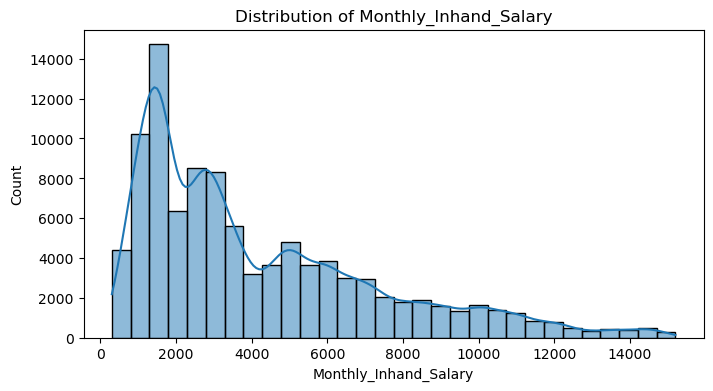

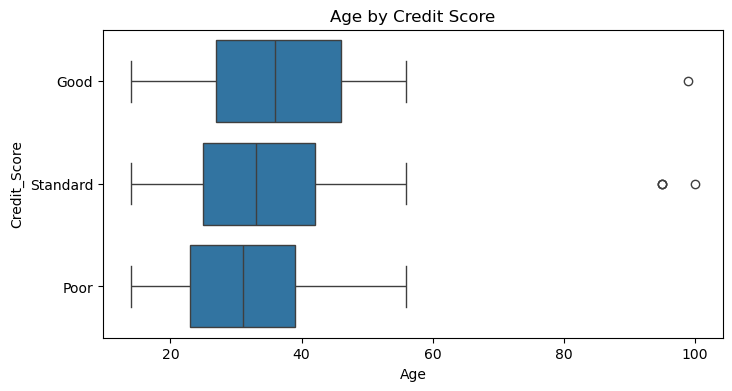

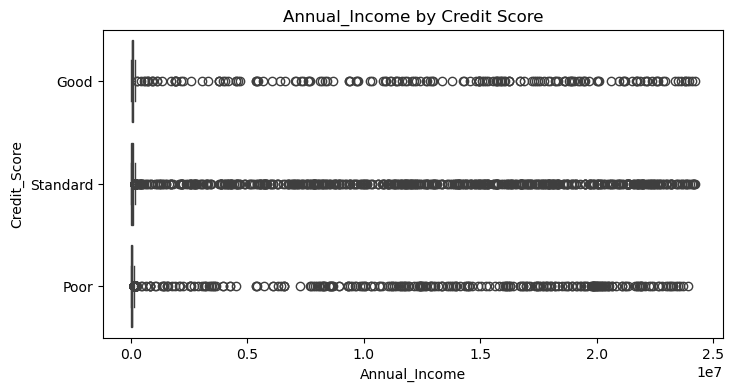

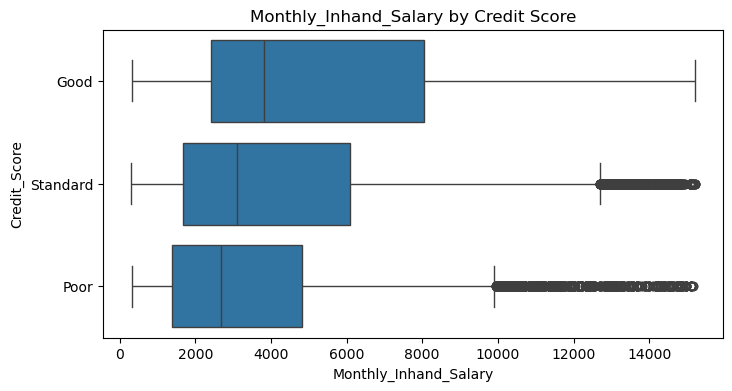

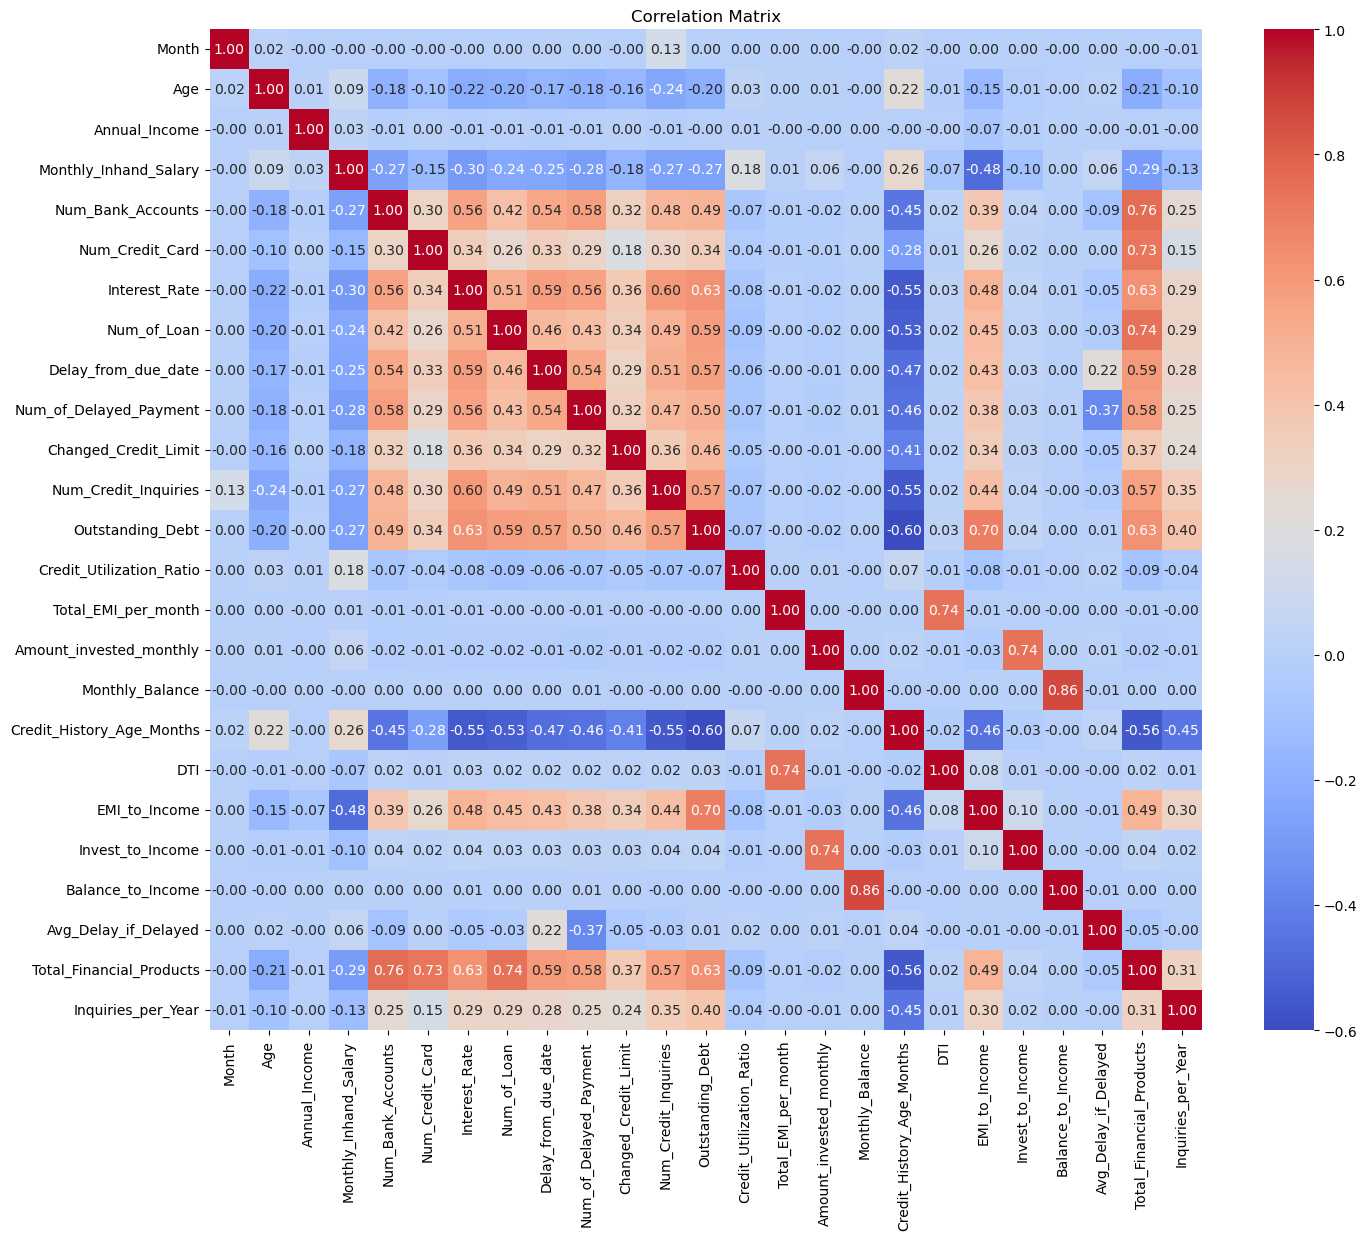

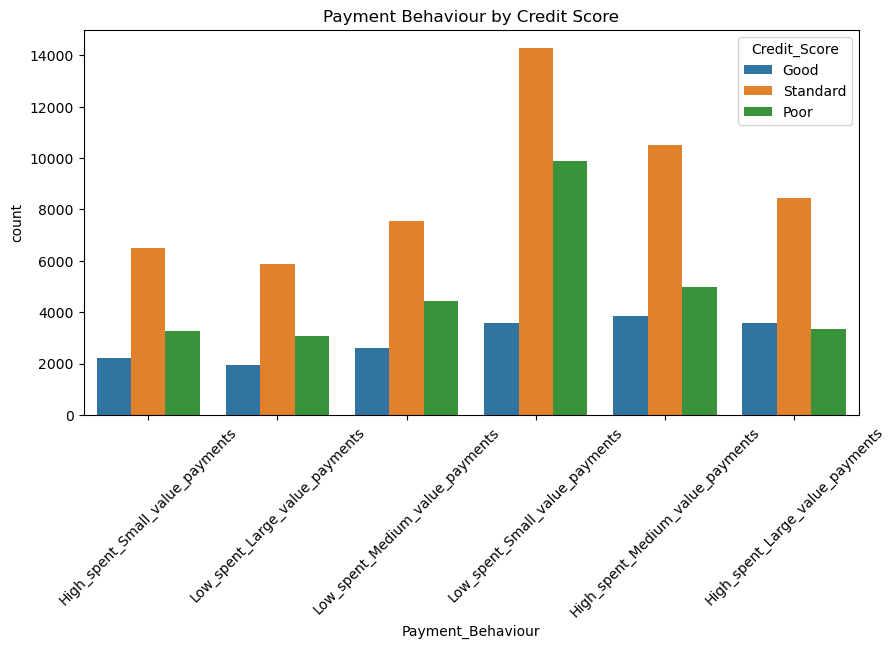

In [198]:
# Set plot style
# sns.set(style="whitegrid")

# 1. Target distribution: Credit_Score class counts
plt.figure(figsize=(6,4))
sns.countplot(data=df_copy, x='Credit_Score')
plt.title('Credit Score Distribution')
plt.show()

# 2. Numeric feature distributions: Histogram for Age, Annual Income, Monthly Salary
num_features = ['Age','Annual_Income', 'Monthly_Inhand_Salary']
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df_copy[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 3. Boxplots of numeric features by Credit_Score to check group differences
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_copy, x=feature, y='Credit_Score')
    plt.title(f'{feature} by Credit Score')
    plt.show()

# 4. Correlation heatmap of numeric variables
plt.figure(figsize=(16,13))
corr_matrix = df_copy.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# 5. Count plot for categorical variable 'Payment_Behaviour' segmented by Credit Score
plt.figure(figsize=(10,5))
sns.countplot(data=df_copy, x='Payment_Behaviour', hue='Credit_Score')
plt.title('Payment Behaviour by Credit Score')
plt.xticks(rotation=45)
plt.show()


In [187]:
obj_cols = [col for col in df_copy.columns if df_copy[col].dtype == 'O']
num_cols = [col for col in df_copy.columns if df_copy[col].dtype != 'O']
discreet_features = [col for col in num_cols if df_copy[col].nunique() < 20]
continuous_features = [col for col in num_cols if df_copy[col].nunique() >= 20]
print(f'obj_cols:{obj_cols}')
print(f'num_cols:{num_cols}')
print(f'discreet_features:{discreet_features}')
print(f'continuous_features:{continuous_features}')


obj_cols:['Customer_ID', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
num_cols:['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_History_Age_Months', 'DTI', 'EMI_to_Income', 'Invest_to_Income', 'Balance_to_Income', 'Avg_Delay_if_Delayed', 'Has_Delays', 'High_Utilization', 'Total_Financial_Products', 'Inquiries_per_Year', 'Limit_Decrease_Flag', 'Large_Limit_Change']
discreet_features:['Month', 'Has_Delays', 'High_Utilization', 'Limit_Decrease_Flag', 'Large_Limit_Change']
continuous_features:['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_dat

# Train Test Split

In [ ]:
# from sklearn.model_selection import train_test_split
# X = df_copy.drop(columns=['Credit_Score'])
# y = df_copy['Credit_Score']

In [ ]:
# y.value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 35), (20000, 35), (80000,), (20000,))

In [ ]:
# categorical_cols = X.select_dtypes(include=['object', 'string']).columns
# num_cols = X.select_dtypes(exclude=['object']).columns
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
# from sklearn.compose import ColumnTransformer
# #Column transformers is used to apply different preprocessing steps to different subsets of 
# # features like OneHotEncoding for categorical features and StandardScaling for numerical features.
# numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder(drop='first')
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('StandardScaler', numeric_transformer, num_cols),
#         ('OneHotEncoder', oh_transformer, categorical_cols)
#     ])

In [ ]:
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

## Random Forest Classifier Training

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

In [ ]:
# models = {'RandomForest': RandomForestClassifier(),
#           'DecisionTree': DecisionTreeClassifier(),
# }

# for i in range(len(list(models))):
#     model = list(models.values())[i]
#     model_name = list(models.keys())[i]
#     print(f'Training model: {model_name}')
#     model.fit(X_train, y_train)
    
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)

#     print('Report for Training Data')
#     print(f'Classification Report for {model_name}:')
#     print(classification_report(y_train, y_train_pred))
#     print('Confusion Matrix:')
#     print(confusion_matrix(y_train, y_train_pred))
#     print(f'Accuracy: {accuracy_score(y_train, y_train_pred)}')
#     print(f'F1 Score: {f1_score(y_train, y_train_pred, average="weighted")}')
#     print(f'Precision: {precision_score(y_train, y_train_pred, average="weighted")}')
#     print(f'Recall: {recall_score(y_train, y_train_pred, average="weighted")}')
#     # print(f'ROC AUC Score: {roc_auc_score(y_train, y_train_pred)}')
#     print('---------------------------------------------')

#     print('Report for Testing Data')
#     print(f'Classification Report for {model_name}:')
#     print(classification_report(y_test, y_test_pred))
#     print('Confusion Matrix:')
#     print(confusion_matrix(y_test, y_test_pred))
#     print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')
#     print(f'F1 Score: {f1_score(y_test, y_test_pred, average="weighted")}')
#     print(f'Precision: {precision_score(y_test, y_test_pred, average="weighted")}')
#     print(f'Recall: {recall_score(y_test, y_test_pred, average="weighted")}')
#     # print(f'ROC AUC Score: {roc_auc_score(y_test, y_test_pred)}')
#     print('---------------------------------------------')


# # X_train = preprocessor.fit_transform(X_train)
# # X_test = preprocessor.transform(X_test)


Training model: RandomForest
Report for Training Data
Classification Report for RandomForest:
              precision    recall  f1-score   support

        Good       1.00      1.00      1.00     14262
        Poor       1.00      1.00      1.00     23199
    Standard       1.00      1.00      1.00     42539

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

Confusion Matrix:
[[14262     0     0]
 [    0 23199     0]
 [    0     0 42539]]
Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
---------------------------------------------
Report for Testing Data
Classification Report for RandomForest:
              precision    recall  f1-score   support

        Good       0.80      0.79      0.79      3566
        Poor       0.81      0.84      0.82      5799
    Standard       0.84      0.83      0.83     10635

    accuracy                           0.82     20000
   mac

In [131]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy['Occupation'] = le.fit_transform(df_copy['Occupation'])
df_copy['Payment_Behaviour'] = le.fit_transform(df_copy['Payment_Behaviour'])
print(f"Encoded Data: {df_copy['Occupation'].unique()}")
print(f"Encoded Data: {df_copy['Payment_Behaviour'].unique()}")

Encoded Data: [12 13  4  5  2  7 10  3  6  8  0 11  9 14  1]
Encoded Data: [2 3 4 5 1 0]


In [132]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
# df_copy['Credit_Mix'] = oe.fit_transform(df_copy[['Credit_Mix']])
# df_copy['Credit_Score'] = oe.fit_transform(df_copy[['Credit_Score']])
# df_copy['Payment_of_Min_Amount'] = oe.fit_transform(df_copy[['Payment_of_Min_Amount']])
# print(f"Encoded Data: {df_copy['Credit_Mix'].unique()}")
# print(f"Encoded Data: {df_copy['Credit_Score'].unique()}")
# print(f"Encoded Data: {df_copy['Payment_of_Min_Amount'].unique()}")


encoded_cols = ['Credit_Mix', 'Payment_of_Min_Amount','Credit_Score']
# oe = OrdinalEncoder()
df_copy[encoded_cols] = oe.fit_transform(df_copy[encoded_cols])

# Get mapping for each column individually:
for i, col in enumerate(encoded_cols):
    print(f"{col} categories and their codes:")
    for code, category in enumerate(oe.categories_[i]):
        print(f"  Code {code}: {category}")


Credit_Mix categories and their codes:
  Code 0: Bad
  Code 1: Good
  Code 2: Standard
Payment_of_Min_Amount categories and their codes:
  Code 0: No
  Code 1: Yes
Credit_Score categories and their codes:
  Code 0: Good
  Code 1: Poor
  Code 2: Standard


In [133]:
# Function to split 'Type_of_Loan' into a list

def split_loan_types(s):
    if pd.isna(s):
        return []
    # Normalize " and " into commas
    s = s.replace(" and ", ", ")
    # Split on comma and strip spaces
    return [loan.strip() for loan in s.split(",") if loan.strip()]

df_copy["Type_of_Loan_List"] = df_copy["Type_of_Loan"].apply(split_loan_types)
df_copy["Type_of_Loan_List"]


0        [Auto Loan, Credit-Builder Loan, Personal Loan...
1        [Auto Loan, Credit-Builder Loan, Personal Loan...
2        [Auto Loan, Credit-Builder Loan, Personal Loan...
3        [Auto Loan, Credit-Builder Loan, Personal Loan...
4        [Auto Loan, Credit-Builder Loan, Personal Loan...
                               ...                        
99995                            [Auto Loan, Student Loan]
99996                            [Auto Loan, Student Loan]
99997                            [Auto Loan, Student Loan]
99998                            [Auto Loan, Student Loan]
99999                            [Auto Loan, Student Loan]
Name: Type_of_Loan_List, Length: 100000, dtype: object

In [134]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
loan_dummies = pd.DataFrame(
    mlb.fit_transform(df_copy["Type_of_Loan_List"]),
    columns=mlb.classes_,
    index=df_copy.index
)

df_copy = pd.concat([df_copy, loan_dummies], axis=1)

# Drop original text columns if you no longer need them
df_copy = df_copy.drop(columns=["Type_of_Loan", "Type_of_Loan_List"])
df_copy

Customer_ID  Month   Age  Occupation  Annual_Income  \
0             d40      1  23.0          12       19114.12   
1             d40      2  23.0          12       19114.12   
2             d40      3  23.0          12       19114.12   
3             d40      4  23.0          12       19114.12   
4             d40      5  23.0          12       19114.12   
...           ...    ...   ...         ...            ...   
99995        942c      4  25.0           9       39628.99   
99996        942c      5  25.0           9       39628.99   
99997        942c      6  25.0           9       39628.99   
99998        942c      7  25.0           9       39628.99   
99999        942c      8  25.0           9       39628.99   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                1824.843333                3.0              4.0   
1                1824.843333                3.0              4.0   
2                1824.843333                3.0              4.0   
3                1824.843333                3.0              4.0   
4                1824.843333                3.0              4.0   
...                      ...                ...              ...   
99995            3359.415833                4.0              6.0   
99996            3359.415833                4.0              6.0   
99997            3359.415833                4.0              6.0   
99998            3359.415833                4.0              6.0   
99999            3359.415833                4.0              6.0   

       Interest_Rate  Num_of_Loan  ...  Credit_History_Age_Months  Auto Loan  \
0                3.0          4.0  ...                      265.0          1   
1                3.0          4.0  ...                      219.0          1   
2                3.0          4.0  ...                      267.0          1   
3                3.0          4.0  ...                      268.0          1   
4                3.0          4.0  ...                      269.0          1   
...              ...          ...  ...                        ...        ...   
99995            7.0          2.0  ...                      378.0          1   
99996            7.0          2.0  ...                      379.0          1   
99997            7.0          2.0  ...                      380.0          1   
99998            7.0          2.0  ...                      381.0          1   
99999            7.0          2.0  ...                      382.0          1   

       Credit-Builder Loan  Debt Consolidation Loan  Home Equity Loan  \
0                        1                        0                 1   
1                        1                        0                 1   
2                        1                        0                 1   
3                        1                        0                 1   
4                        1                        0                 1   
...                    ...                      ...               ...   
99995                    0                        0                 0   
99996                    0                        0                 0   
99997                    0                        0                 0   
99998                    0                        0                 0   
99999                    0                        0                 0   

       Mortgage Loan  Not Specified  Payday Loan  Personal Loan  Student Loan  
0                  0              0            0              1             0  
1                  0              0            0              1             0  
2                  0              0            0              1             0  
3                  0              0            0              1             0  
4                  0              0            0              1             0  
...              ...            ...          ...            ...           ...  
99995              0              0            0          

In [135]:
feature_outliers=['Annual_Income','Age','Monthly_Inhand_Salary']

for feature in feature_outliers:
    f1 = df_copy[feature]
    minimum,Q1,median,Q3,maximum=np.quantile(f1,[0,0.25,0.50,0.75,1.0])
    minimum,Q1,median,Q3,maximum
    IQR=Q3-Q1
    lower = df_copy[feature].quantile(0.06)
    upper = df_copy[feature].quantile(0.94)
    df_copy[feature+'_Capped'] = df_copy[feature].clip(lower=lower, upper=upper)
    print(f'{feature+'_Capped'} has IQR : {IQR}')
    df_copy.drop(columns=feature, inplace=True)
    print(f'{feature} capped between {lower} and {upper}')




Annual_Income_Capped has IQR : 53333.42
Annual_Income capped between 10196.217299999998 and 130169.92
Age_Capped has IQR : 18.0
Age capped between 18.0 and 51.0
Monthly_Inhand_Salary_Capped has IQR : 4334.8758333333335
Monthly_Inhand_Salary capped between 897.1120833333333 and 10431.183333333332


In [136]:
features_capped = ['Age_Capped', 'Annual_Income_Capped', 'Monthly_Inhand_Salary_Capped']
for feature in features_capped:
    col = df_copy[feature]
    lower_capped = (col == col.min()).sum()
    upper_capped = (col == col.max()).sum()
    lower_capped_pct = lower_capped / len(col) * 100
    upper_capped_pct = upper_capped / len(col) * 100
    print(f"{feature}:")
    print(f"  Lower cap count: {lower_capped} ({lower_capped_pct:.2f}%)")
    print(f"  Upper cap count: {upper_capped} ({upper_capped_pct:.2f}%)")
    if lower_capped_pct > 5 or upper_capped_pct > 5:
        print("  >> More than 5% of data is at one of the caps. Consider adjusting thresholds or using a log transform.")

Age_Capped:
  Lower cap count: 8308 (8.31%)
  Upper cap count: 7228 (7.23%)
  >> More than 5% of data is at one of the caps. Consider adjusting thresholds or using a log transform.
Annual_Income_Capped:
  Lower cap count: 6000 (6.00%)
  Upper cap count: 6003 (6.00%)
  >> More than 5% of data is at one of the caps. Consider adjusting thresholds or using a log transform.
Monthly_Inhand_Salary_Capped:
  Lower cap count: 6002 (6.00%)
  Upper cap count: 6002 (6.00%)
  >> More than 5% of data is at one of the caps. Consider adjusting thresholds or using a log transform.


In [137]:
df_copy['Annual_Income_log'] = np.log1p(df_copy['Annual_Income_Capped'])
df_copy['Monthly_Inhand_Salary_log'] = np.log1p(df_copy['Monthly_Inhand_Salary_Capped'])
df_copy['Age_log'] = np.log1p(df_copy['Age_Capped'])


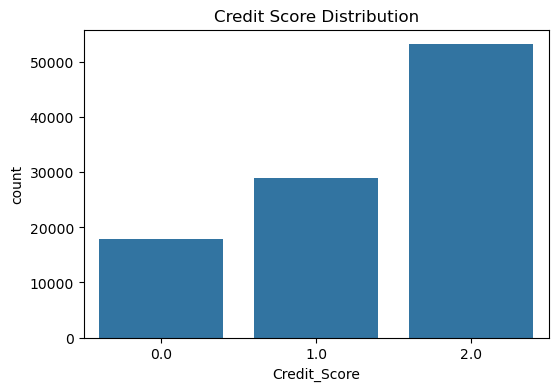

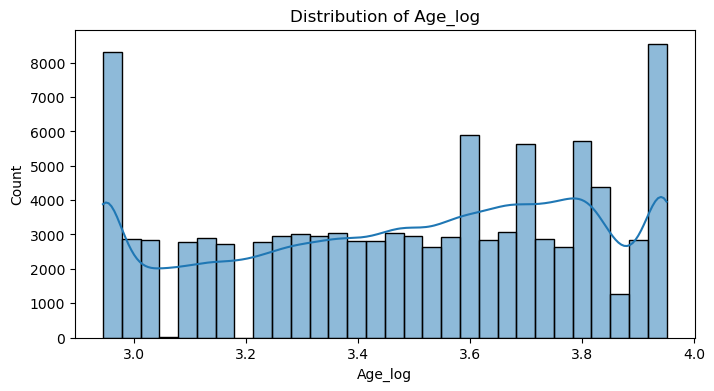

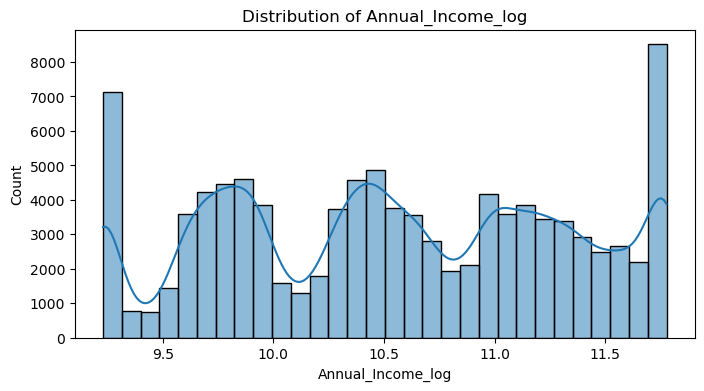

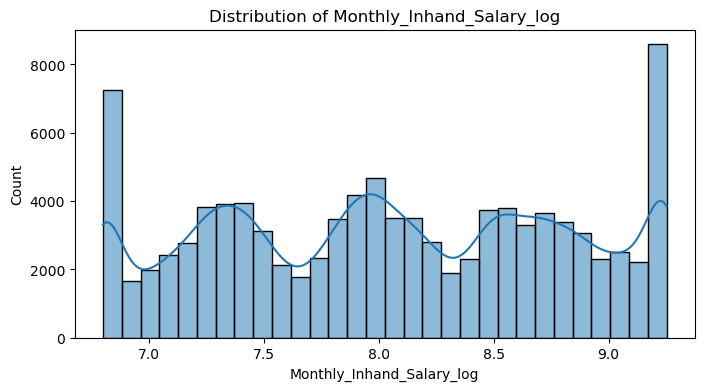

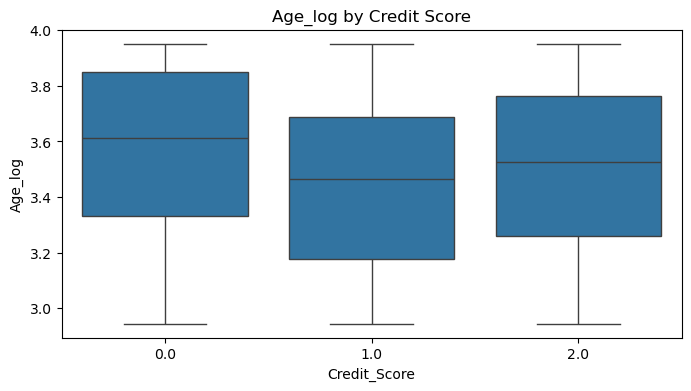

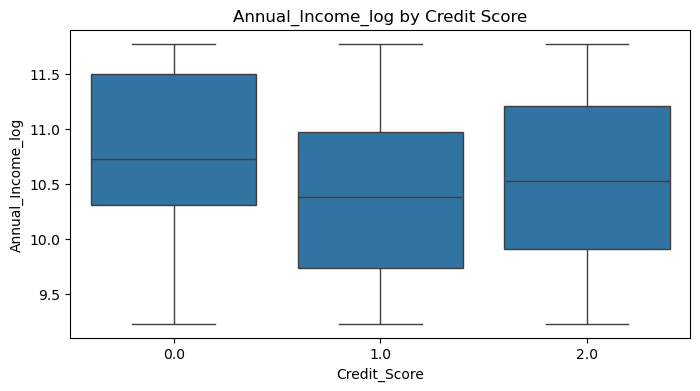

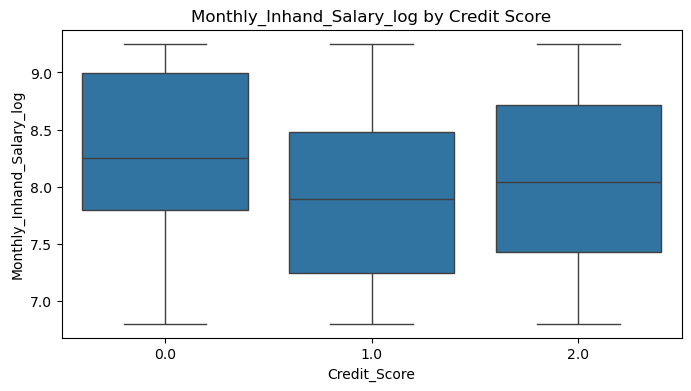

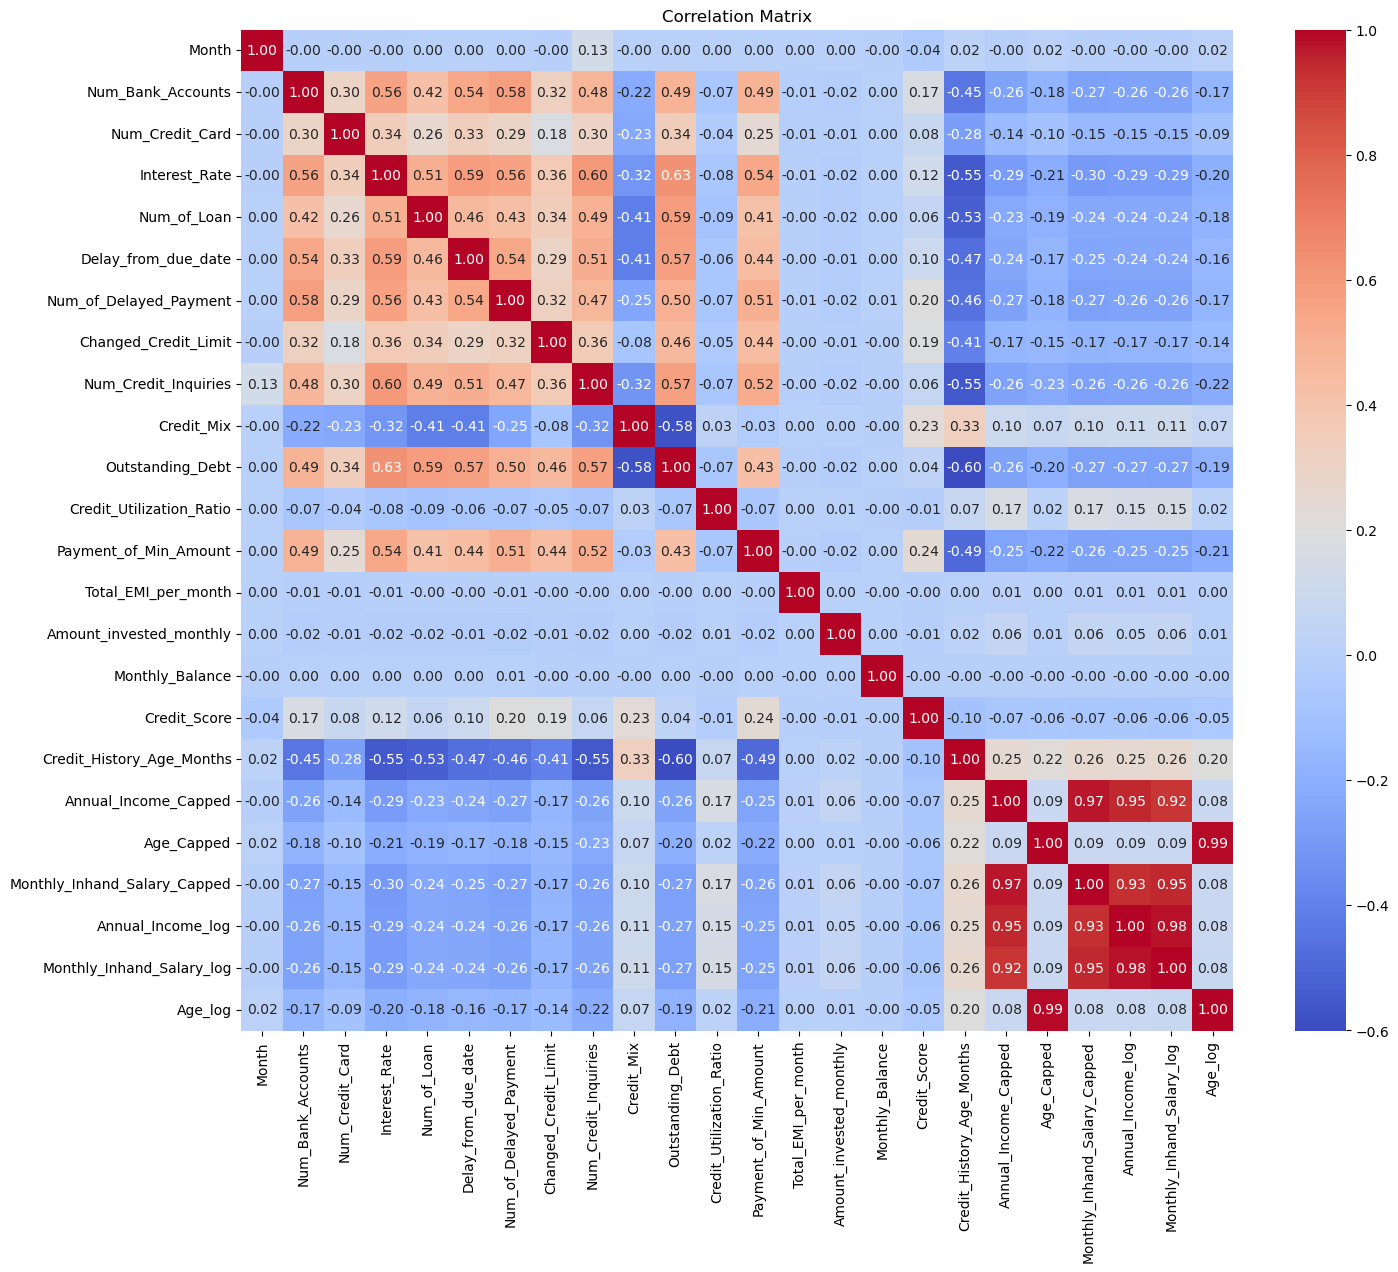

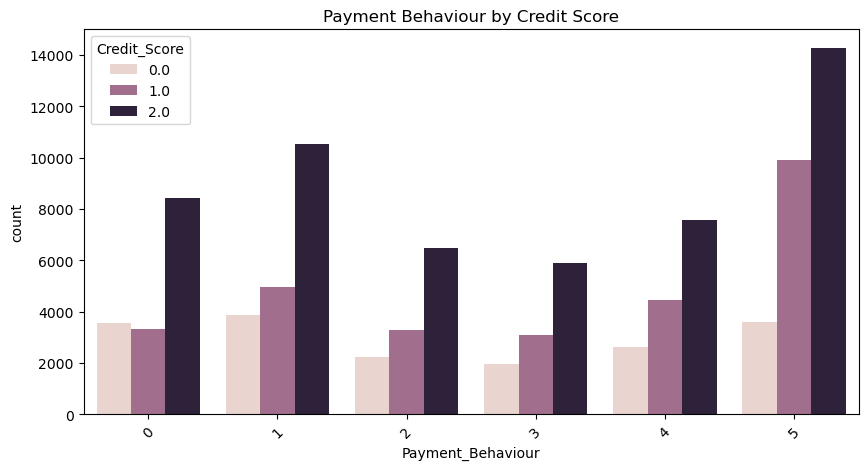

In [138]:
# Set plot style
# sns.set(style="whitegrid")

# 1. Target distribution: Credit_Score class counts
plt.figure(figsize=(6,4))
sns.countplot(data=df_copy, x='Credit_Score')
plt.title('Credit Score Distribution')
plt.show()

# 2. Numeric feature distributions: Histogram for Age, Annual Income, Monthly Salary
num_features = ['Age_log','Annual_Income_log', 'Monthly_Inhand_Salary_log']
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df_copy[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 3. Boxplots of numeric features by Credit_Score to check group differences
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_copy, x='Credit_Score', y=feature)
    plt.title(f'{feature} by Credit Score')
    plt.show()

# 4. Correlation heatmap of numeric variables
plt.figure(figsize=(16,13))
corr_matrix = df_copy.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# 5. Count plot for categorical variable 'Payment_Behaviour' segmented by Credit Score
plt.figure(figsize=(10,5))
sns.countplot(data=df_copy, x='Payment_Behaviour', hue='Credit_Score')
plt.title('Payment Behaviour by Credit Score')
plt.xticks(rotation=45)
plt.show()


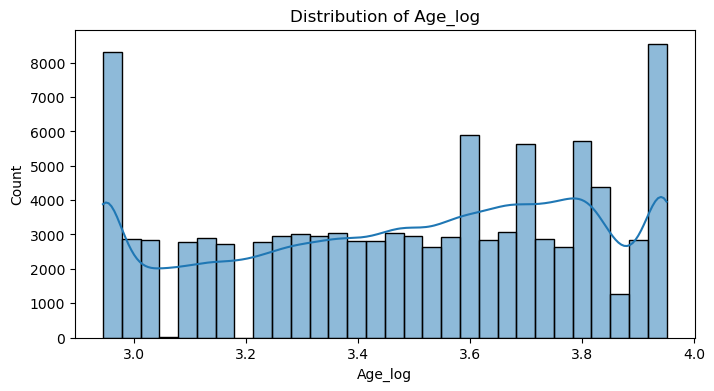

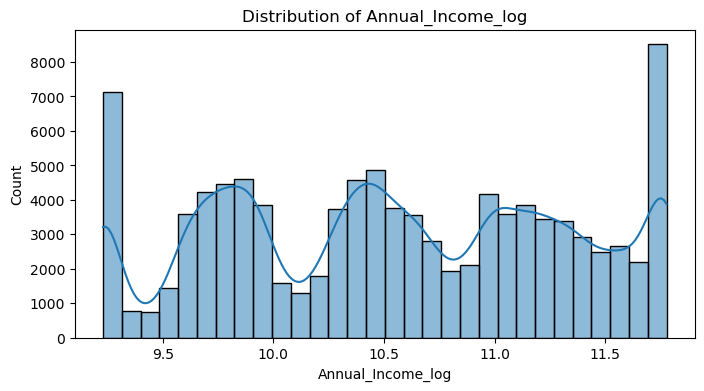

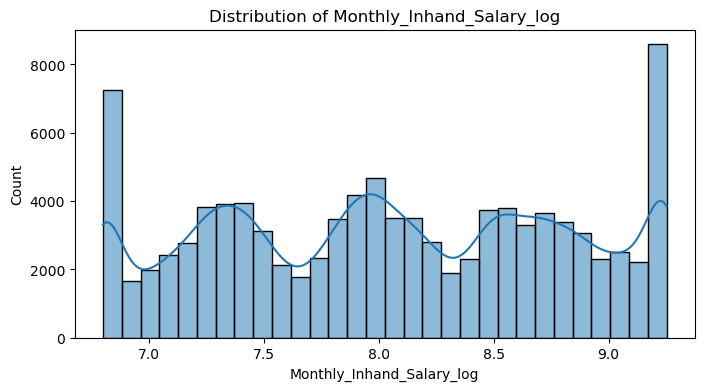

In [139]:
num_features = ['Age_log','Annual_Income_log', 'Monthly_Inhand_Salary_log']
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df_copy[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [140]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Customer_ID                   100000 non-null  object 
 1   Month                         100000 non-null  int64  
 2   Occupation                    100000 non-null  int32  
 3   Num_Bank_Accounts             100000 non-null  float64
 4   Num_Credit_Card               100000 non-null  float64
 5   Interest_Rate                 100000 non-null  float64
 6   Num_of_Loan                   100000 non-null  float64
 7   Delay_from_due_date           100000 non-null  int64  
 8   Num_of_Delayed_Payment        100000 non-null  float64
 9   Changed_Credit_Limit          100000 non-null  float64
 10  Num_Credit_Inquiries          100000 non-null  float64
 11  Credit_Mix                    100000 non-null  float64
 12  Outstanding_Debt              100000 non-null

In [141]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Customer_ID                   100000 non-null  object 
 1   Month                         100000 non-null  int64  
 2   Occupation                    100000 non-null  int32  
 3   Num_Bank_Accounts             100000 non-null  float64
 4   Num_Credit_Card               100000 non-null  float64
 5   Interest_Rate                 100000 non-null  float64
 6   Num_of_Loan                   100000 non-null  float64
 7   Delay_from_due_date           100000 non-null  int64  
 8   Num_of_Delayed_Payment        100000 non-null  float64
 9   Changed_Credit_Limit          100000 non-null  float64
 10  Num_Credit_Inquiries          100000 non-null  float64
 11  Credit_Mix                    100000 non-null  float64
 12  Outstanding_Debt              100000 non-null

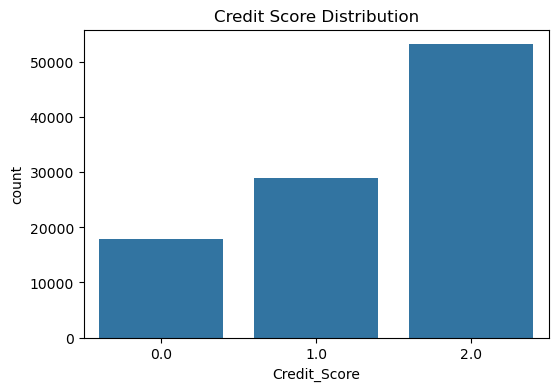

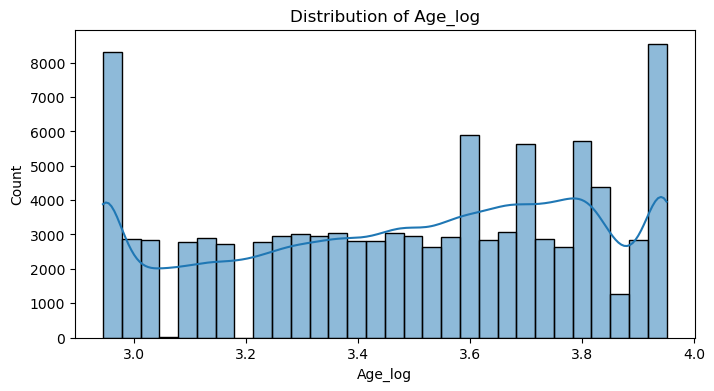

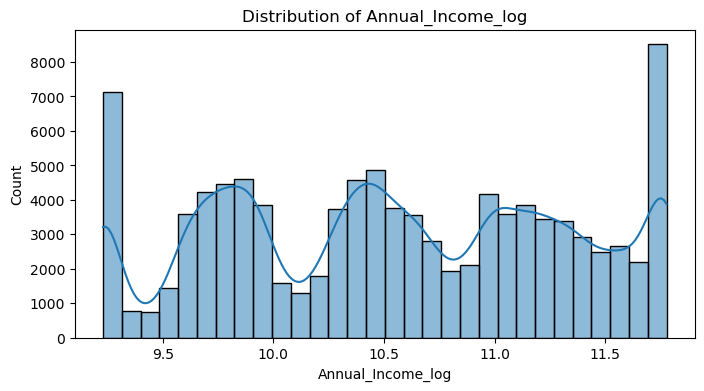

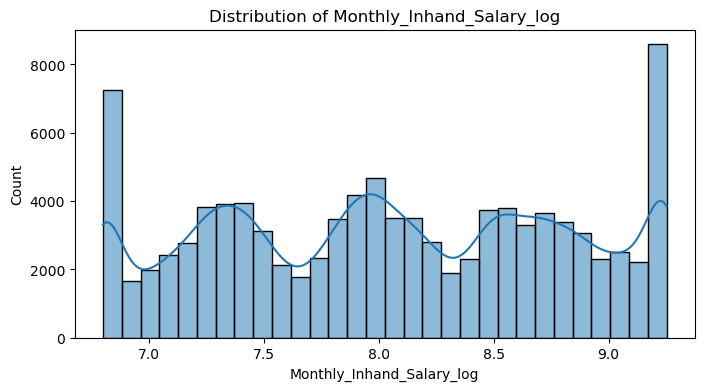

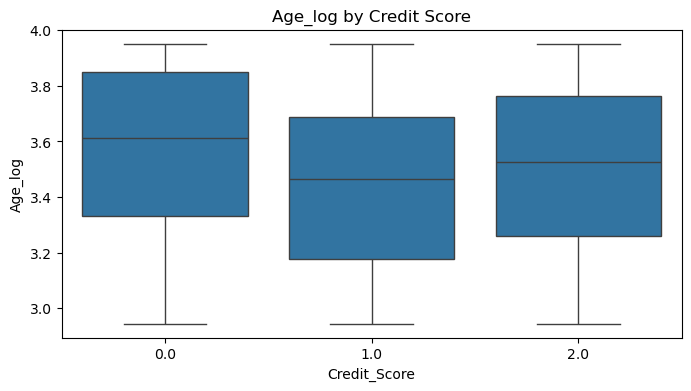

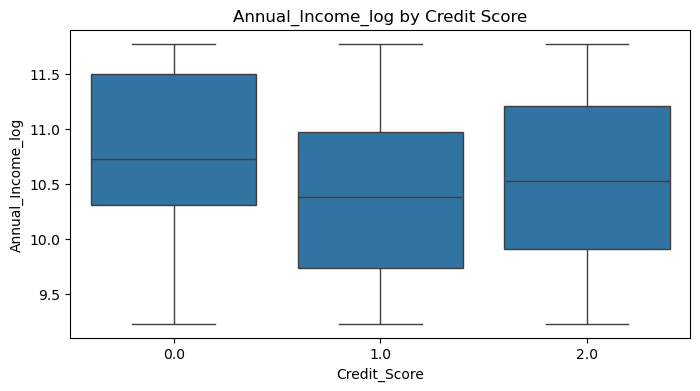

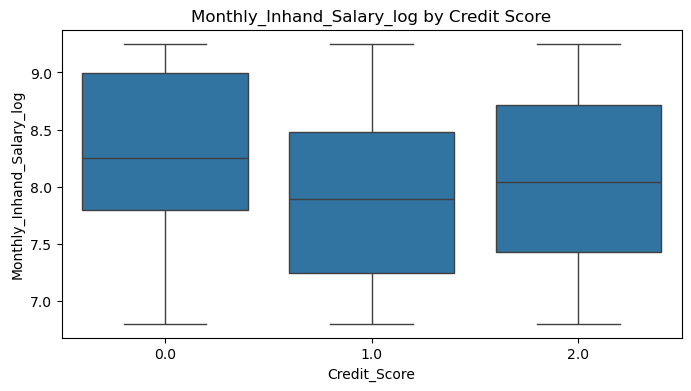

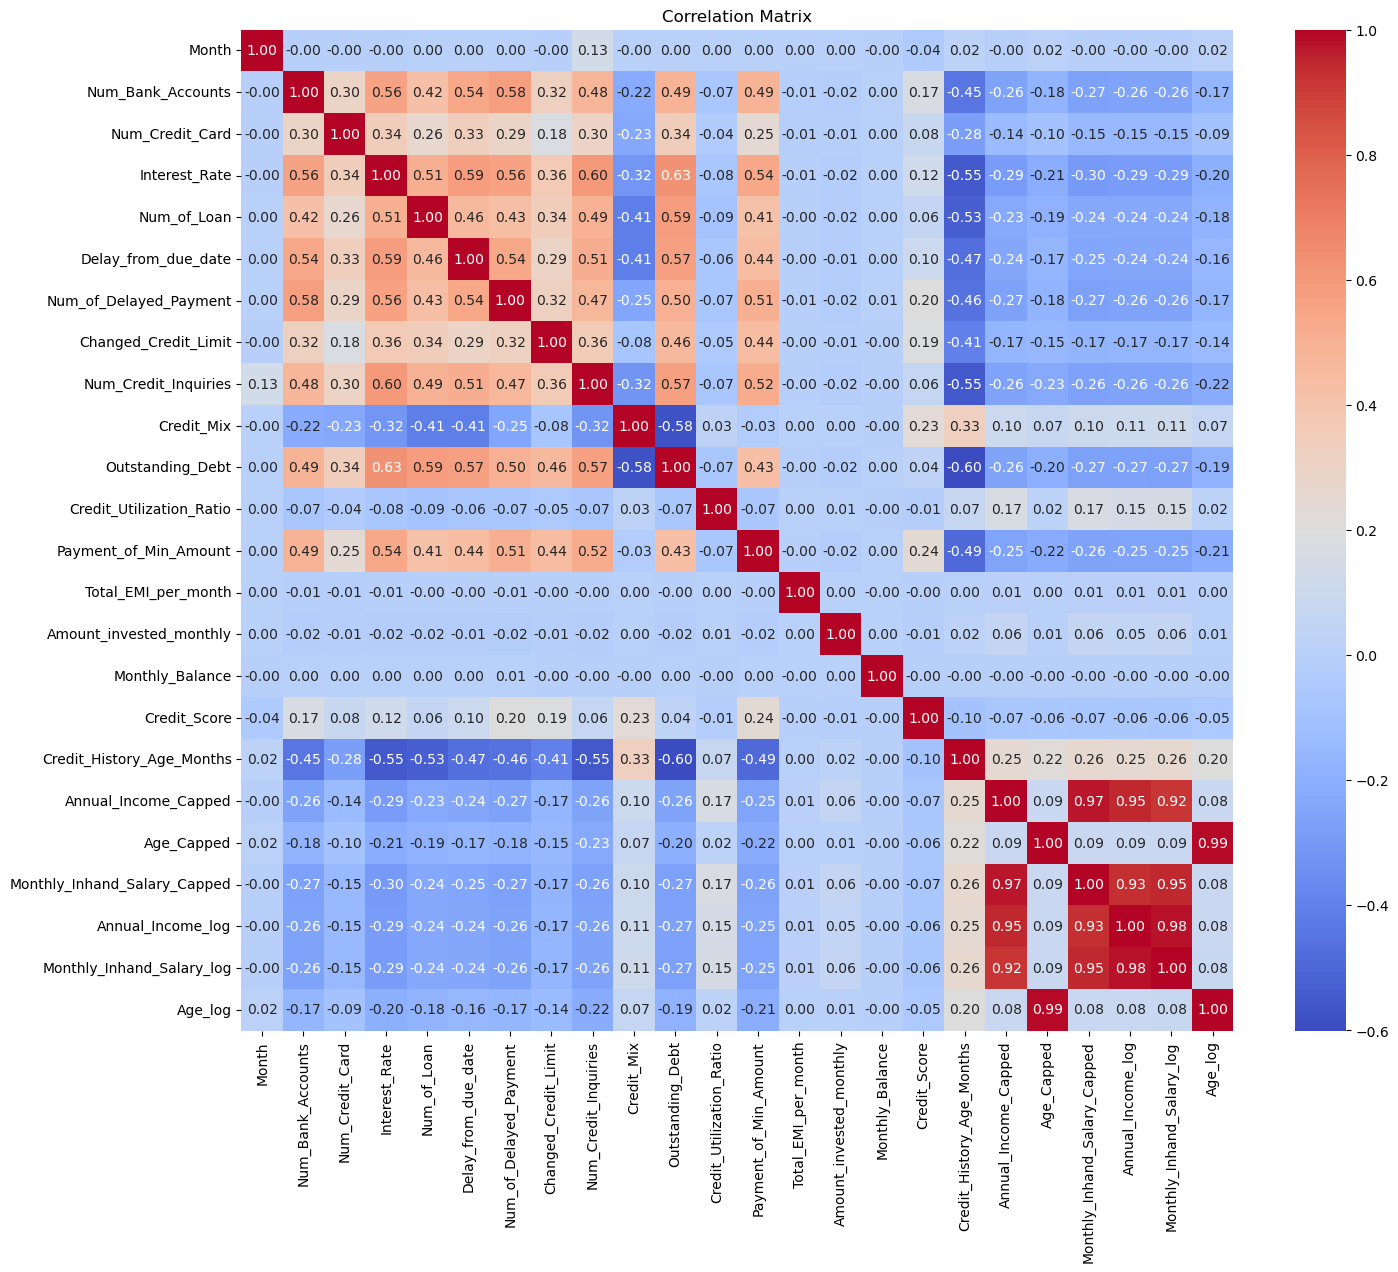

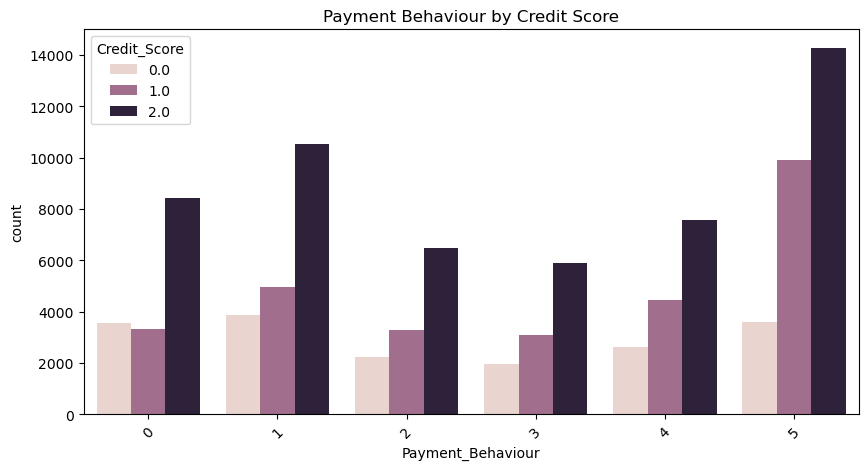

In [142]:
# Set plot style
# sns.set(style="whitegrid")

# 1. Target distribution: Credit_Score class counts
plt.figure(figsize=(6,4))
sns.countplot(data=df_copy, x='Credit_Score')
plt.title('Credit Score Distribution')
plt.show()

# 2. Numeric feature distributions: Histogram for Age, Annual Income, Monthly Salary
num_features = ['Age_log','Annual_Income_log', 'Monthly_Inhand_Salary_log']
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df_copy[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 3. Boxplots of numeric features by Credit_Score to check group differences
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df_copy, x='Credit_Score', y=feature)
    plt.title(f'{feature} by Credit Score')
    plt.show()

# 4. Correlation heatmap of numeric variables
plt.figure(figsize=(16,13))
corr_matrix = df_copy.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# 5. Count plot for categorical variable 'Payment_Behaviour' segmented by Credit Score
plt.figure(figsize=(10,5))
sns.countplot(data=df_copy, x='Payment_Behaviour', hue='Credit_Score')
plt.title('Payment Behaviour by Credit Score')
plt.xticks(rotation=45)
plt.show()


1. Age is well distributed and can help discriminate higher and lower credit scores, but outlier ages should be checked.
2. Income is predictive, especially after log transformation. Outlier salaries should be capped or transformed to avoid biasing the model.
3. Log transformation works well; further capping may improve robustness.
4. Your dataset is moderately imbalanced and may require resampling or stratification for fair model training and evaluation.
5.  Payment behavior is a strong categorical predictor and should be encoded for modeling.
6. Use correlations to remove redundant variables and spot key predictive drivers.
7. 

In [143]:
df_copy.drop(columns=['Customer_ID'], inplace=True)

In [144]:
print(df_copy['Age_Capped'].count())
df_copy['Age_Capped'].sort_values().unique()

100000


array([18. , 18.5, 19. , 20. , 20.5, 21. , 22. , 23. , 23.5, 24. , 25. ,
       25.5, 26. , 26.5, 27. , 28. , 28.5, 29. , 30. , 30.5, 31. , 32. ,
       32.5, 33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 37. , 38. , 39. ,
       40. , 40.5, 41. , 41.5, 42. , 43. , 44. , 45. , 46. , 47. , 48. ,
       48.5, 49. , 50. , 50.5, 51. ])

In [145]:
# print(df_copy['Age'].count())

In [151]:
drop_cols = ['Total_EMI_per_month','Outstanding_Debt','Amount_invested_monthly','Monthly_Balance','Delay_from_due_date',
             'Num_of_Delayed_Payment','Credit_Utilization_Ratio','Num_Bank_Accounts','Num_Credit_Card','Num_of_Loan',
             'Num_Credit_Inquiries','Credit_History_Age_Months','Changed_Credit_Limit','Monthly_Inhand_Salary_Capped',
             'Annual_Income_Capped','Age_Capped','Credit_Mix']
for col in drop_cols:
    df_copy.drop(columns=[col], inplace=True)

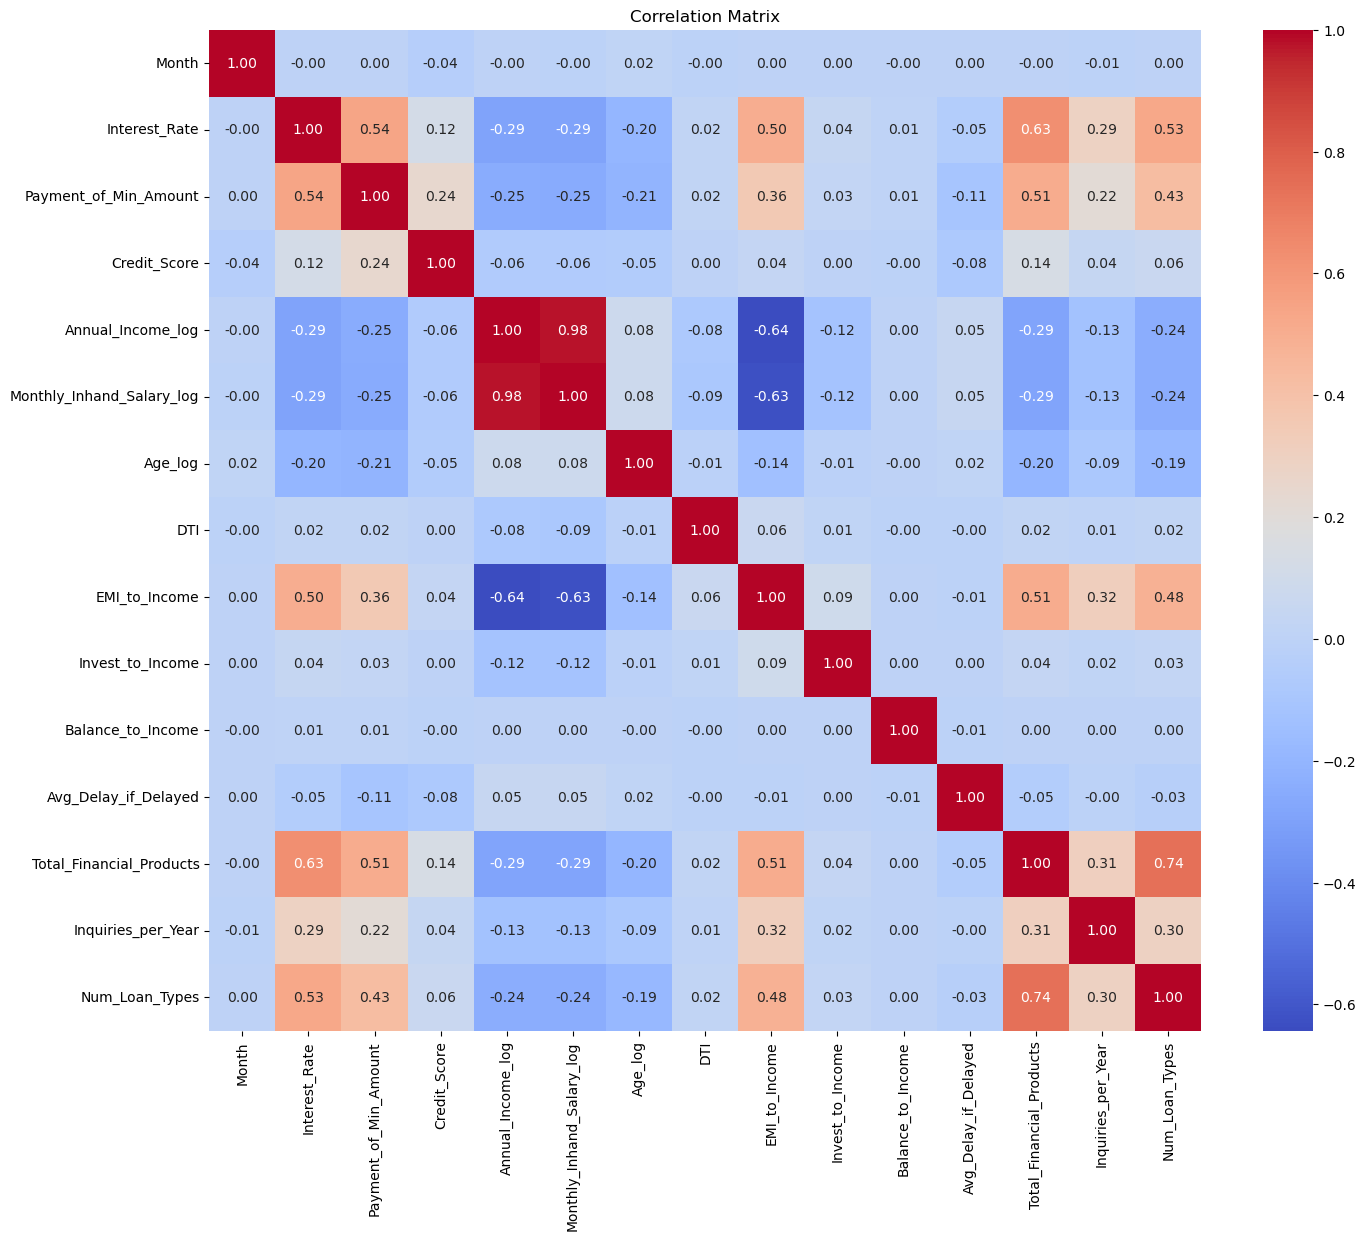

In [152]:
# 4. Correlation heatmap of numeric variables
plt.figure(figsize=(16,13))
corr_matrix = df_copy.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

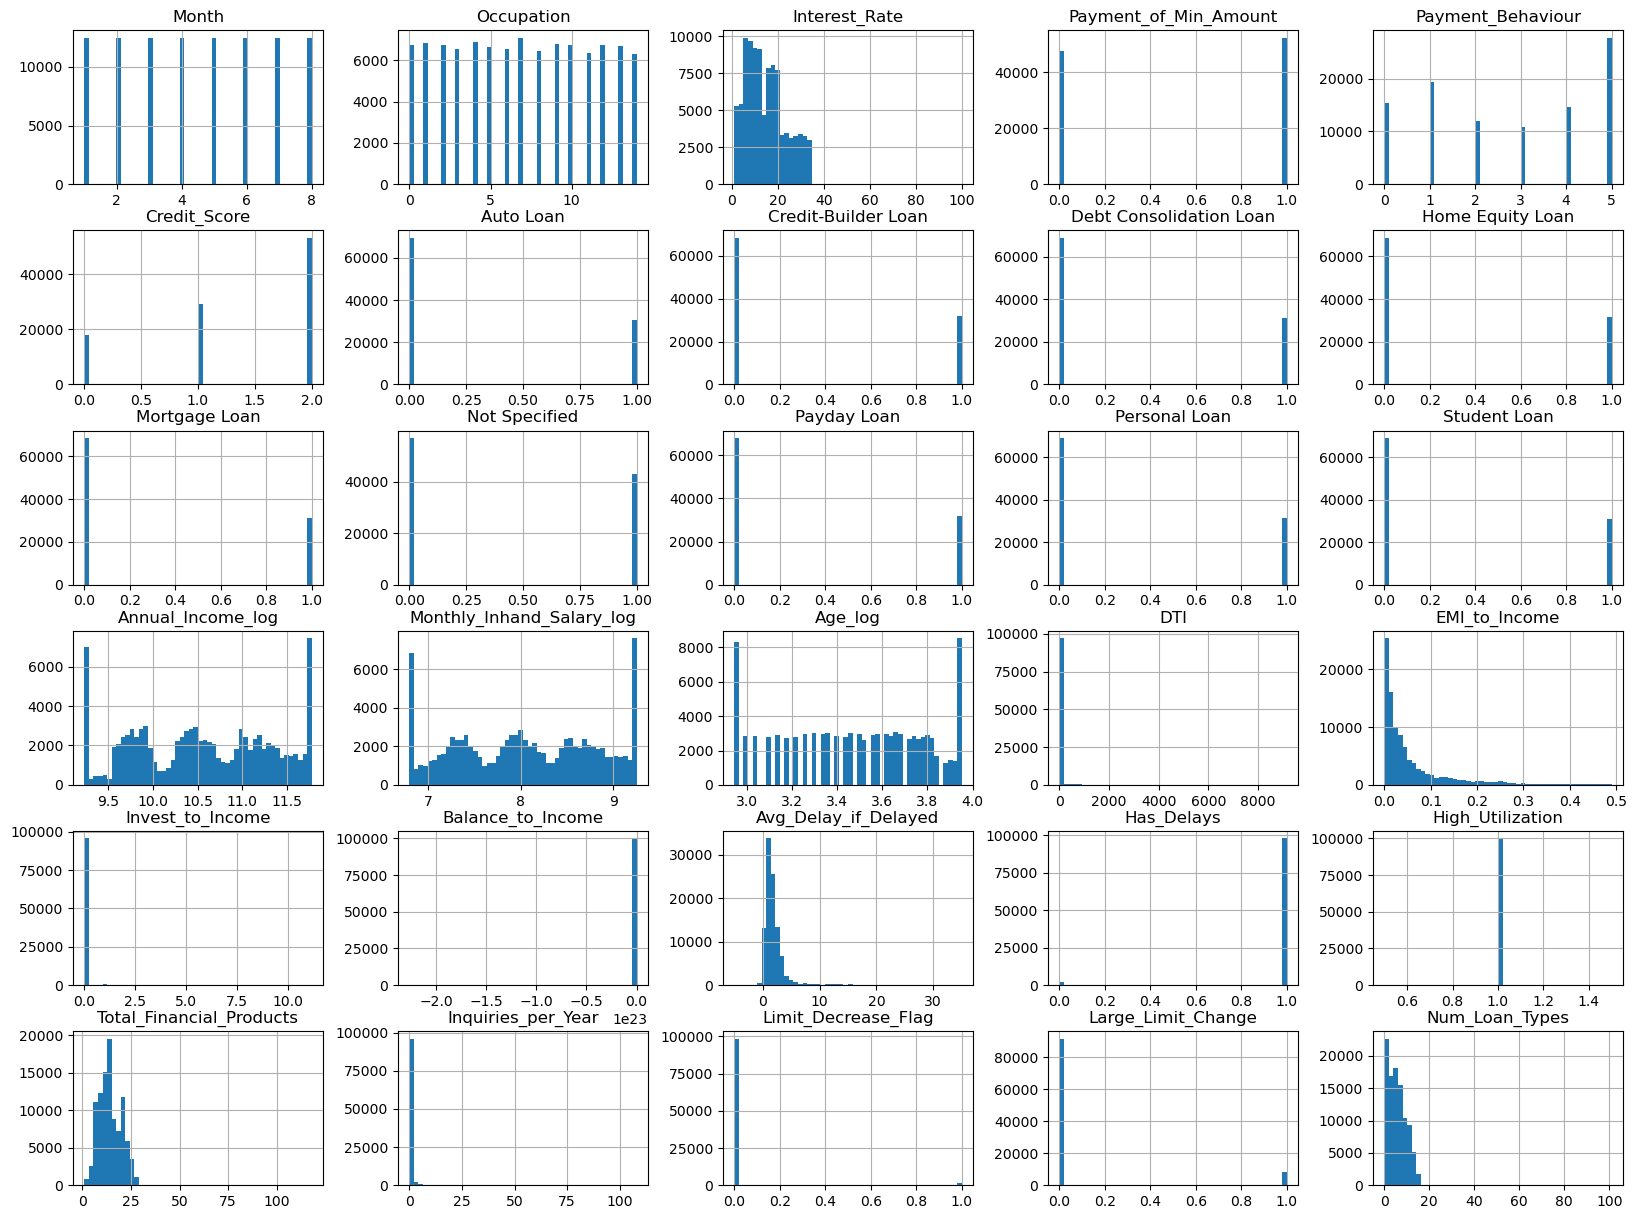

In [153]:
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

In [154]:
df_copy.to_csv('data/cleaned_dataset.csv', index=False)

In [155]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_copy.drop(columns=['Credit_Score'])
y = df_copy['Credit_Score']

# Stratified split to preserve class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [156]:
# Compute correlation matrix
corr_matrix = X_train.corr().abs()

# Find pairs with correlation > 0.9 and mark one as redundant
redundant = set()
threshold = 0.9

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        col1 = corr_matrix.columns[i]
        col2 = corr_matrix.columns[j]
        if corr_matrix.iloc[i, j] > threshold:
            redundant.add(col2)  # choose to drop col2 (earlier column)
print("Redundant features:", redundant)

Redundant features: {'Annual_Income_log'}


In [157]:
X_train_reduced = X_train.drop(columns=list(redundant))
X_test_reduced = X_test.drop(columns=list(redundant))


In [158]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_reduced, y_train)
importances = rf.feature_importances_

# Sort and display top features
feature_ranks = sorted(zip(X_train_reduced.columns, importances), key=lambda x: x[1], reverse=True)
for feature, score in feature_ranks[:10]:
    print(f"{feature}: {score:.4f}")


Interest_Rate: 0.1137
Inquiries_per_Year: 0.1036
EMI_to_Income: 0.0892
Total_Financial_Products: 0.0762
Avg_Delay_if_Delayed: 0.0678
Balance_to_Income: 0.0620
DTI: 0.0595
Monthly_Inhand_Salary_log: 0.0589
Invest_to_Income: 0.0571
Age_log: 0.0479


In [159]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf.predict(X_test_reduced)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8144
Confusion matrix:
 [[2701    4  861]
 [  47 4814  938]
 [ 671 1191 8773]]
              precision    recall  f1-score   support

         0.0       0.79      0.76      0.77      3566
         1.0       0.80      0.83      0.82      5799
         2.0       0.83      0.82      0.83     10635

    accuracy                           0.81     20000
   macro avg       0.81      0.80      0.81     20000
weighted avg       0.81      0.81      0.81     20000



In [160]:
# Get predicted and actual values
y_pred = rf.predict(X_test_reduced)
test_results = X_test_reduced.copy()
test_results['True_Score'] = y_test
test_results['Pred_Score'] = y_pred

# Filter to misclassified cases
misclassified = test_results[test_results['True_Score'] != test_results['Pred_Score']]
misclassified.head()
# print("Number of misclassified cases:", len(misclassified))

Month  Occupation  Interest_Rate  Payment_of_Min_Amount  \
31428      5           1            6.0                    0.0   
25685      6          14           17.0                    1.0   
82733      6           9            5.0                    0.0   
67328      1           1           24.0                    1.0   
2353       2           5            6.0                    0.0   

       Payment_Behaviour  Auto Loan  Credit-Builder Loan  \
31428                  3          0                    0   
25685                  0          1                    0   
82733                  4          0                    1   
67328                  5          1                    1   
2353                   3          1                    1   

       Debt Consolidation Loan  Home Equity Loan  Mortgage Loan  ...  \
31428                        0                 0              0  ...   
25685                        0                 1              0  ...   
82733                        0                 0              0  ...   
67328                        1                 0              0  ...   
2353                         0                 1              1  ...   

       Avg_Delay_if_Delayed  Has_Delays  High_Utilization  \
31428              4.500000           1                 1   
25685              1.272727           1                 1   
82733             12.500000           1                 1   
67328              2.315789           1                 1   
2353               0.250000           1                 1   

       Total_Financial_Products  Inquiries_per_Year  Limit_Decrease_Flag  \
31428                       9.0            0.149626                    0   
25685                      12.0            0.242915                    0   
82733                       7.0            0.061856                    0   
67328                      14.0            0.913043                    0   
2353                       12.0            0.188976                    0   

       Large_Limit_Change  Num_Loan_Types  True_Score  Pred_Score  
31428                   0             3.0         2.0         0.0  
25685                   0             7.0         2.0         1.0  
82733                   0             3.0         1.0         2.0  
67328                   0             6.0         2.0         1.0  
2353                    0             8.0         0.0         2.0  

[5 rows x 30 columns]

In [161]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X_train_reduced, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation accuracies: [0.8004375 0.80075   0.8035    0.7985625 0.7989375]
Mean CV accuracy: 0.8004374999999999


In [162]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_reduced, y_train)
print("Best parameters:", grid.best_params_)
print("Best CV score:", grid.best_score_)

Best parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Best CV score: 0.740474988043749


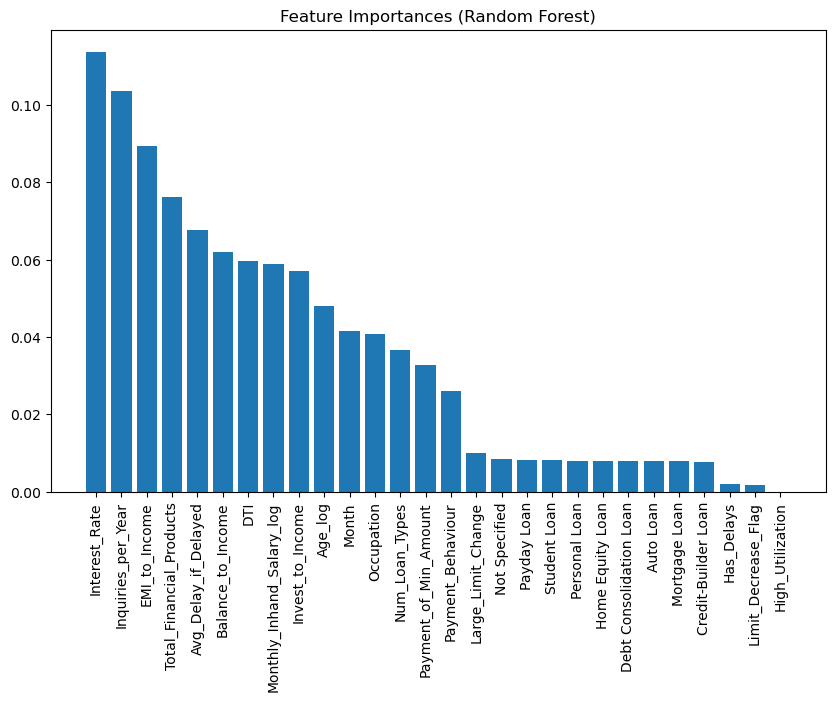

In [163]:
# import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_reduced, y_train)

importances = rf.feature_importances_
indices = importances.argsort()[::-1]
features_sorted = X_train_reduced.columns[indices]

# Bar plot
plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), features_sorted, rotation=90)
plt.title("Feature Importances (Random Forest)")
plt.show()


In [164]:
from sklearn.pipeline import Pipeline
import joblib

# Example pipeline (add preprocessors as needed)
pipeline = Pipeline([
    ('model', rf)
])

pipeline.fit(X_train_reduced, y_train)
joblib.dump(pipeline, "credit_rf_pipeline.pkl")

# Save feature order for future predictions
with open("feature_list.txt", "w") as f:
    for col in X_train_reduced.columns:
        f.write(col + "\n")

In [165]:
from sklearn.pipeline import Pipeline
import joblib

# Example pipeline (add preprocessors as needed)
pipeline = Pipeline([
    ('model', rf)
])

pipeline.fit(X_train_reduced, y_train)
joblib.dump(pipeline, "credit_rf_pipeline.pkl")

# Save feature order for future predictions
with open("feature_list.txt", "w") as f:
    for col in X_train_reduced.columns:
        f.write(col + "\n")


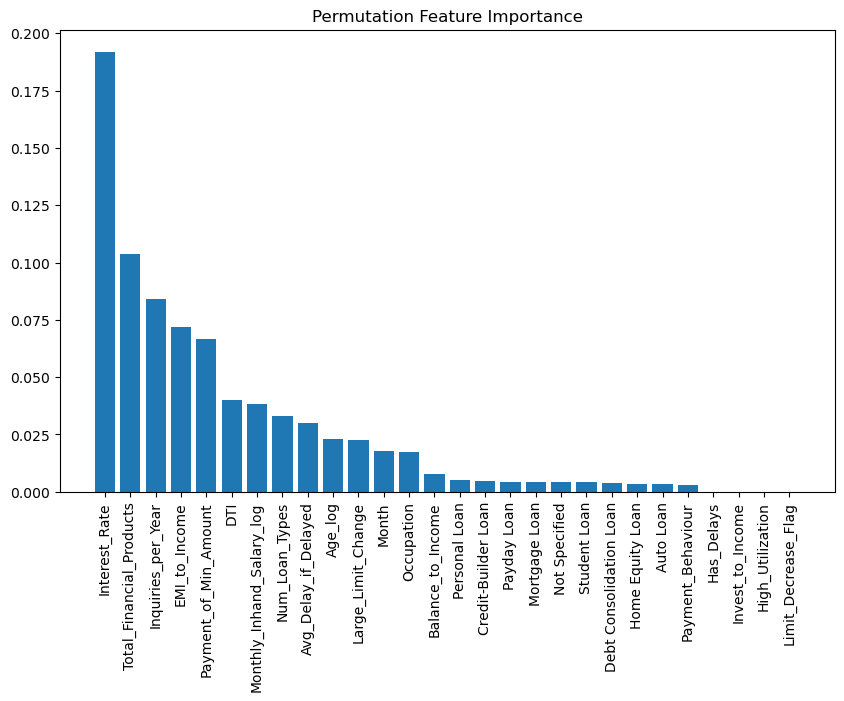

In [166]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf, X_test_reduced, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(result.importances_mean)), result.importances_mean[perm_sorted_idx], align="center")
plt.xticks(range(len(result.importances_mean)), X_test_reduced.columns[perm_sorted_idx], rotation=90)
plt.title("Permutation Feature Importance")
plt.show()


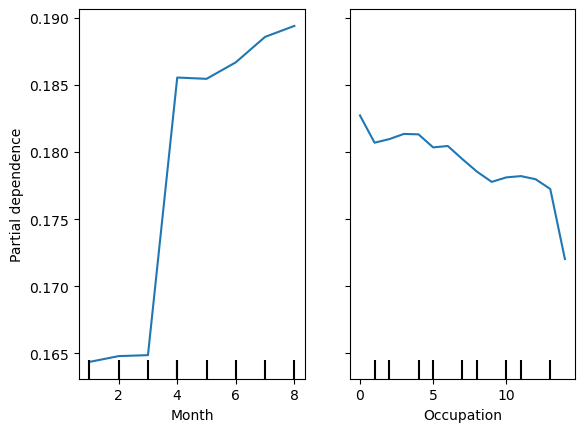

In [167]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(rf, X_test_reduced, [0, 1], feature_names=X_test_reduced.columns, target=0)
plt.show()


In [168]:
%pip install lime

from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train_reduced.values, feature_names=X_train_reduced.columns, class_names=['Poor', 'Standard', 'Good'], discretize_continuous=True)
i = 0  # index of instance to explain
exp = explainer.explain_instance(X_test_reduced.values[i], rf.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)


Note: you may need to restart the kernel to use updated packages.


In [169]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_reduced, y_train)
print("LR accuracy:", lr.score(X_test_reduced, y_test))

# Support Vector Machine
svc = SVC(random_state=42)
svc.fit(X_train_reduced, y_train)
print("SVM accuracy:", svc.score(X_test_reduced, y_test))


LR accuracy: 0.29005
SVM accuracy: 0.53175


In [170]:
# import joblib

# joblib.dump(rf, "credit_rf_model.pkl")
# joblib.dump(X_train_reduced.columns.tolist(), "feature_columns.pkl")


In [171]:
def predict_new(data_row, model, feature_list):
    # Assume data_row is a dict matching the full cleaned feature list
    import pandas as pd
    features = pd.DataFrame([data_row])[feature_list]
    return model.predict(features)[0]
